In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config
import chemicalchecker

# Set CC Verbosity
ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

2024-04-08 17:18:39,223 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_model_links/"  # Link to Current CC
local_cc_dir = '../local_CC_D6'  # Link to New CC

# Our local CC instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2024-04-08 17:18:39,243 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_D6
2024-04-08 17:18:40,349 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


## New D6 space ##

In [3]:
# Load the raw binary data
# Rows: compounds
# Columns: Uniprot IDs

inputFile="../data/D6/D6_processed_LOG2FC.tsv"

df=pd.read_csv(inputFile, sep='\t', index_col=0)
    
print(df.shape)

(875, 9960)


In [4]:
# a = np.sort(df.fillna(0).values, axis=0)[0]
# b = np.sort(df.fillna(0).values, axis=0)[[0, -1]]

In [5]:
# len([i for i in a if i < -1])

In [6]:
df.head()

,A0A087WT44,A0A087WUW5,A0A087WZ62,A0A096LP01,A0A096LPC5,A0A0A0MRB7,A0A0A6YYJ5,A0A0C4DG89,A0A0G2JH58,A0A0G2JIF2,...,Q9Y6X3,Q9Y6X4,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y1,Q9Y6Y8,R4GMX3,V9GYT7
AAKJLRGGTJKAMG-UHFFFAOYSA-N,0.07,NaN,0.03,NaN,0.16,-0.19,0.08,NaN,-0.17,0.07,...,0.00,0.16,0.04,0.18,0.04,-0.37,NaN,-0.01,-0.03,0.13
AASYYGYJPZBFKC-UHFFFAOYSA-N,0.07,NaN,-0.10,NaN,0.07,0.10,0.03,NaN,0.09,0.03,...,0.00,-0.01,0.05,0.03,0.00,0.12,NaN,0.00,0.01,NaN
ACIMQXSSGMWVKG-UHFFFAOYSA-N,0.03,NaN,0.02,NaN,-0.03,0.08,0.05,NaN,0.20,-0.01,...,0.03,0.01,-0.17,-0.28,0.01,0.26,NaN,0.03,0.01,NaN
ACPOUJIDANTYHO-UHFFFAOYSA-N,-0.08,NaN,-0.06,0.19,0.27,0.04,0.10,NaN,-0.05,-0.05,...,0.04,0.05,-0.02,0.11,0.06,0.06,NaN,0.00,0.19,0.29
ACWZRVQXLIRSDF-UHFFFAOYSA-N,-0.20,0.09,0.13,-0.03,0.44,-0.65,-0.97,0.02,-0.38,0.17,...,-0.03,0.32,0.39,0.16,-0.05,-0.59,NaN,0.08,0.00,0.05


In [7]:
# from collections import Counter
# d = Counter(df.isna().values.flatten())
# print(round(100 * d[False] / (d[True] + d[False]), 3))
print(round(df.isna().mean().mean()*100, 2))

12.5


## sign0 ##

In [8]:
# df = df.fillna(0)

In [9]:
### SIGN0 

In [10]:
# Dataset Name
dataset = 'D6.001'

# Instantiation of sign0 data structures for the new space: full and reference
sign0 = cc_local.signature(dataset, 'sign0')

# Cleaning both full and reference datasets. This is crucial!
sign0.clear_all()

# Fit sign0
sign0.fit(X=df.values, keys=list(df.index), features=list(df.columns), validations=False)

2024-04-05 08:51:06,433 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign0
2024-04-05 08:51:06,441 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign0
2024-04-05 08:51:06,447 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign0
2024-04-05 08:51:06,457 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign0
2024-04-05 08:51:06,458 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign0
2024-04-05 08:51:06,467 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2024-04-05 08:51:06,471 chemic

Features frequency (875, 9960)


Iterating on `V` axis 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.85it/s]
2024-04-05 08:51:08,763 chemicalchecker.util.sanitize.sanitizer.Sanitizer [INFO    ] Filter 0 keys (min_keys_abs): []
2024-04-05 08:51:08,763 chemicalchecker.util.sanitize.sanitizer.Sanitizer [INFO    ] Filter 0 keys (max_keys_freq): []
2024-04-05 08:51:08,764 chemicalchecker.util.sanitize.sanitizer.Sanitizer [DEBUG   ] Missing values:
Iterating on `V` axis 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.44it/s]
2024-04-05 08:51:08,864 chemicalchecker.util.sanitize.sanitizer.Sanitizer [DEBUG   ] NaN  :      1089131
2024-04-05 08:51:08,865 chemicalchecker.util.sanitize.sanitizer.Sanitizer [DEBUG   ] +inf :            0
2024-04-05 08:51:08,865 chemicalchecker.util.sanitize.sanitizer.Sanitizer [DEBUG   ] -inf :            0
2024-04-05 08:51:08,866 chemicalcheck

Flter nans and inf (875, 9960)
Filter too many features (875, 9960)


2024-04-05 08:51:11,552 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Aggregating
2024-04-05 08:51:11,565 chemicalchecker.util.aggregate.aggregate.Aggregate [DEBUG   ] Looking for duplicated keys
2024-04-05 08:51:11,568 chemicalchecker.util.aggregate.aggregate.Aggregate [DEBUG   ] Applying aggregation method
2024-04-05 08:51:11,568 chemicalchecker.util.aggregate.aggregate.AggregateAsMatrix [DEBUG   ] Aggregation method = average
2024-04-05 08:51:11,634 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Saving H5
2024-04-05 08:51:13,263 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Mappings are not available, using implicit key-key mappings.
2024-04-05 08:51:13,265 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] RNDuplicates to use 128 bits
2024-04-05 08:51:13,270 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/r

2024-04-05 08:51:26,156 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign0
2024-04-05 08:51:26,159 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_D6
2024-04-05 08:51:26,461 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-05 08:51:26,465 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 08:52:26,822 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 08:52:32,331 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2024-04-05 08:52:41,666 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2

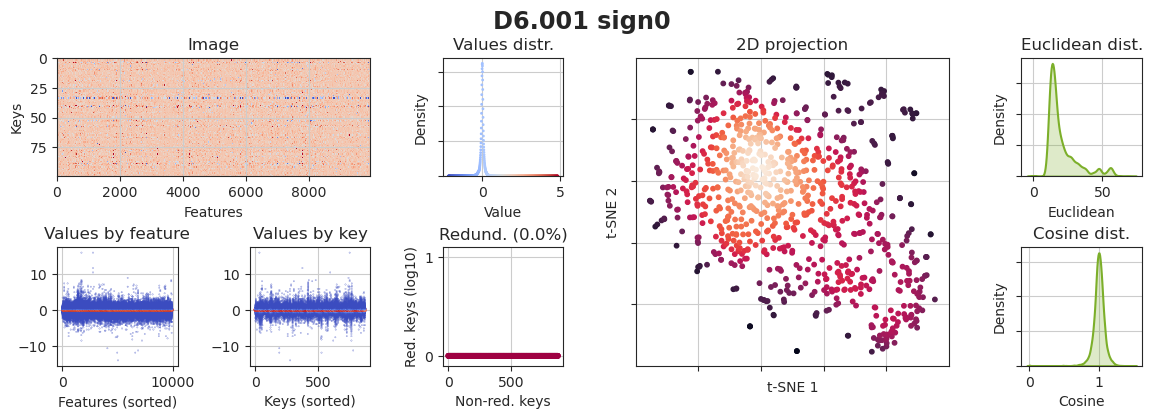

In [11]:
# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of diag0 (diagnosis plots)
diag0 = sign0.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag0.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag0.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag0.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [12]:
sign0.shape

(873, 9960)

In [13]:
min(np.array(sign0).flatten()), max(np.array(sign0).flatten())

(-14.21, 16.02)

## sign1 ##

In [14]:
# Dataset Name
dataset = 'D6.001'

# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Cleaning both full and reference datasets. This is crucial!
sign1.clear_all()

# Fitting sign1
sign1.fit(sign0, validations=False, metric_learning=False)

2024-04-05 08:58:07,135 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign0
2024-04-05 08:58:07,137 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-05 08:58:07,144 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign1
2024-04-05 08:58:07,150 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign1
2024-04-05 08:58:07,160 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-05 08:58:07,161 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Proto

In [15]:
sign1.shape

(873, 544)

2024-04-05 08:58:43,057 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-05 08:58:43,059 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_D6
2024-04-05 08:58:43,213 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-05 08:58:43,216 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 08:58:45,876 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 08:58:49,854 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2024-04-05 08:58:52,312 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2

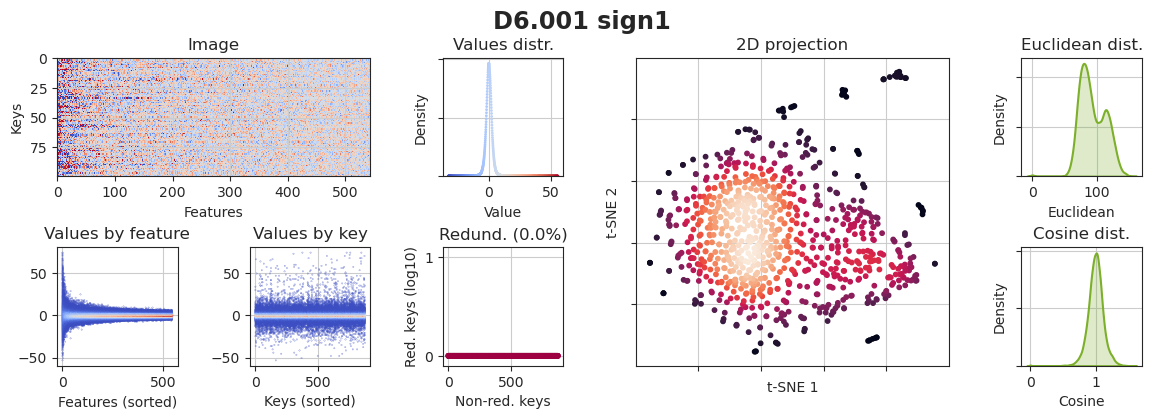

In [16]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of diag1 (diagnosis plots)
diag1 = sign1.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag1.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag1.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag1.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [17]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of neig1
neig1 = cc_local.get_signature("neig1", "full", dataset)  # It will take the reference anyway...

# Cleaning both full and reference. This is crucial!
neig1.clear_all()

# Fitting neig1
neig1.fit(sign1)

2024-04-05 09:01:27,573 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-05 09:01:27,576 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1
2024-04-05 09:01:27,581 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1
2024-04-05 09:01:27,582 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1/neig.h5
2024-04-05 09:01:27,585 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/neig1
2024-04-05 09:01:27,590 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/neig1
2024-04-05 09:01:

In [18]:
neig1.shape

array([873, 873])

In [19]:
min(np.array(sign1).flatten()), max(np.array(sign1).flatten())

(-53.87291645407342, 74.3844521857306)

## sign2 ##

2024-04-05 09:15:10,822 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-05 09:15:10,827 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1
2024-04-05 09:15:10,830 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1
2024-04-05 09:15:10,831 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/neig1/neig.h5
2024-04-05 09:15:10,833 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign2
2024-04-05 09:15:10,842 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign2
202

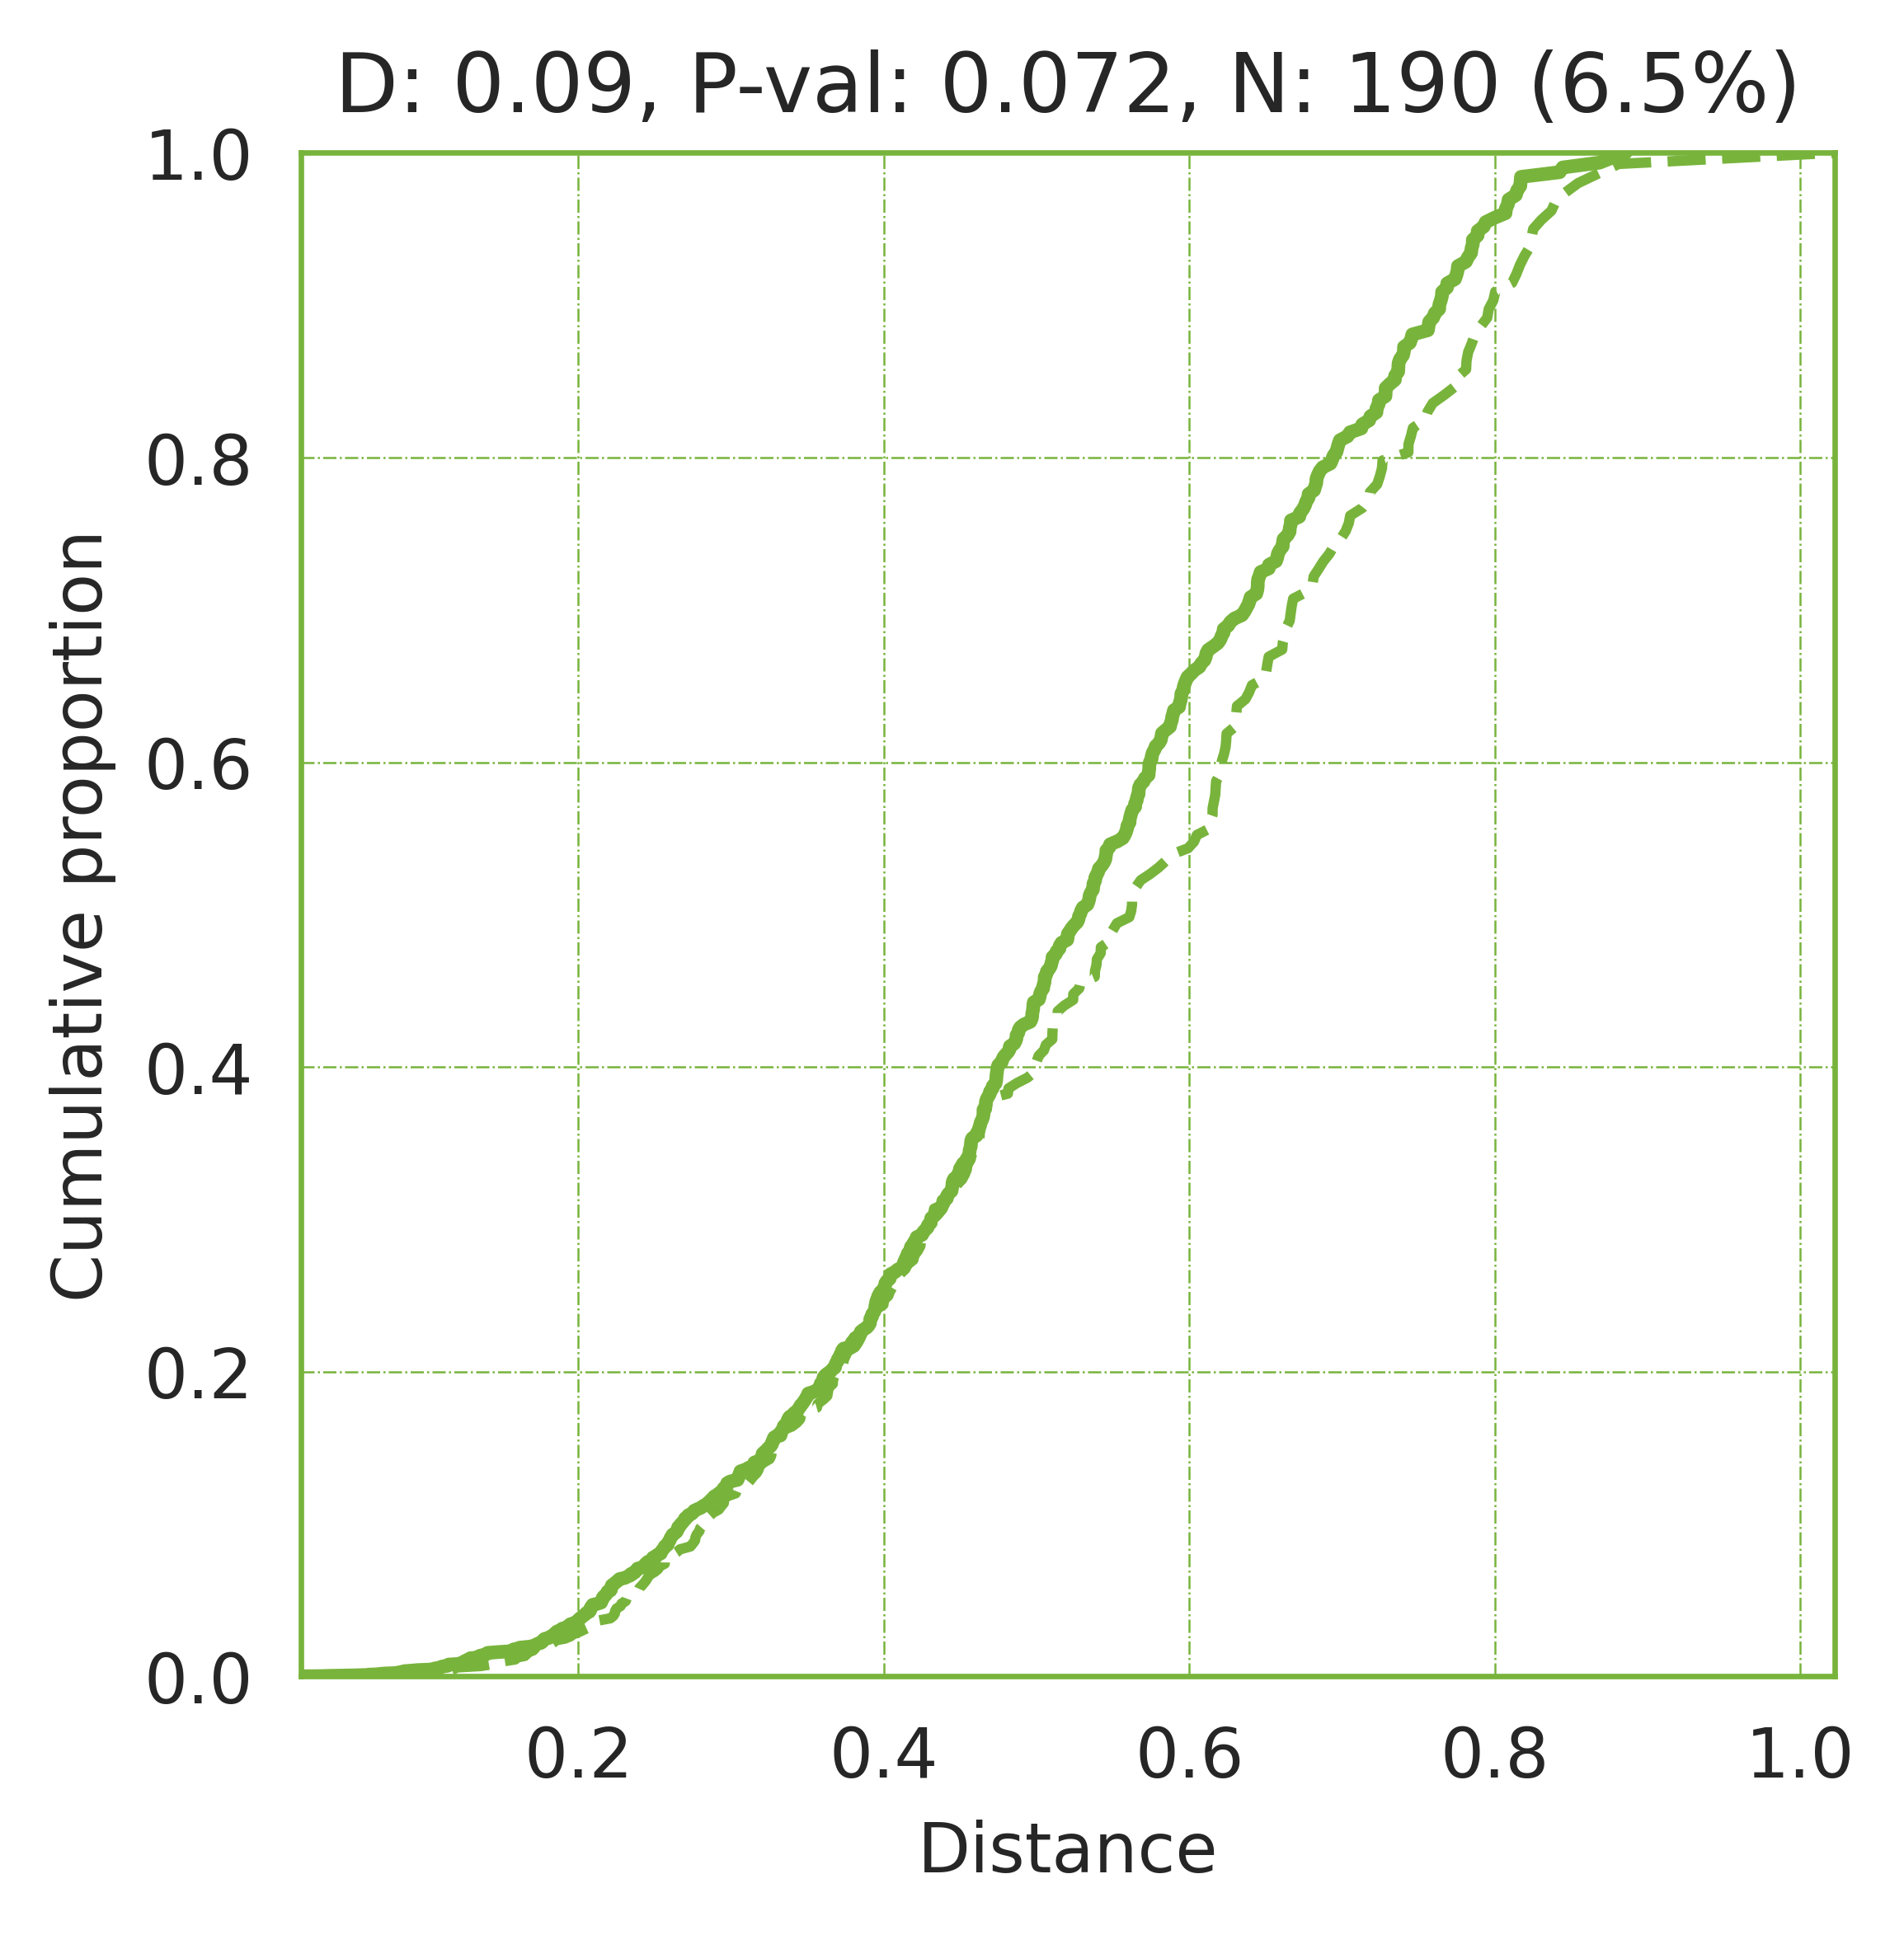

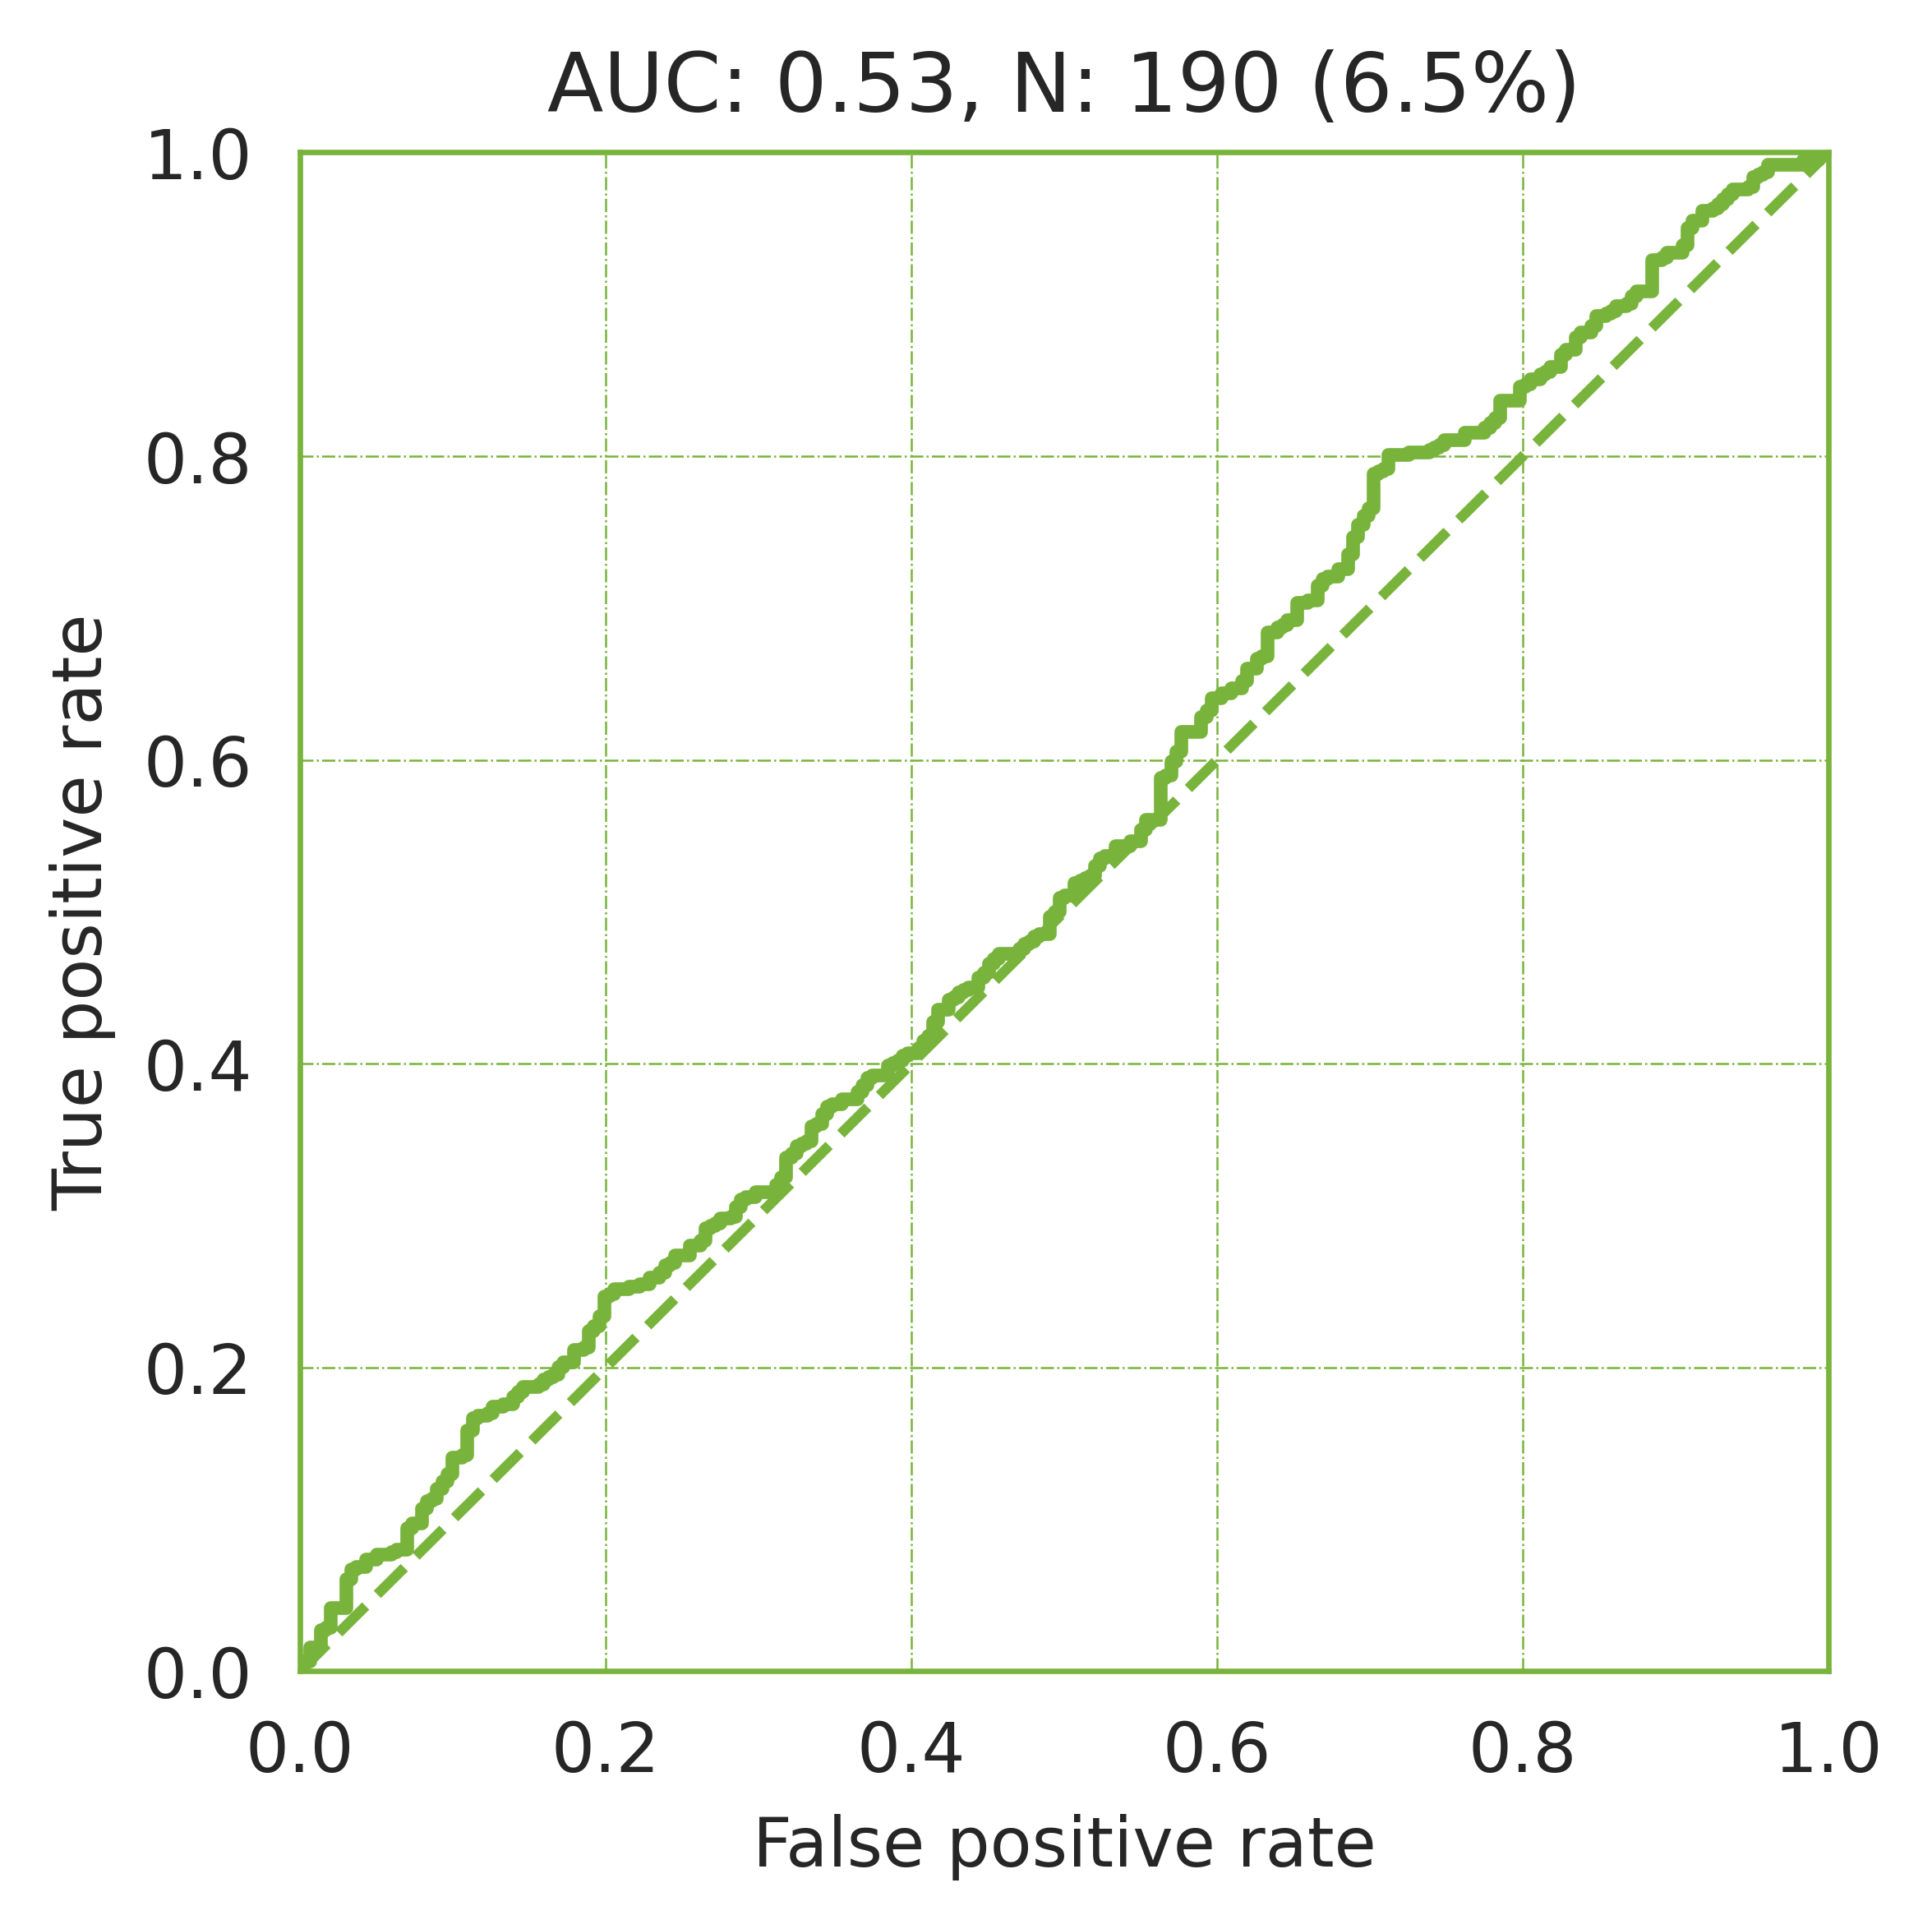

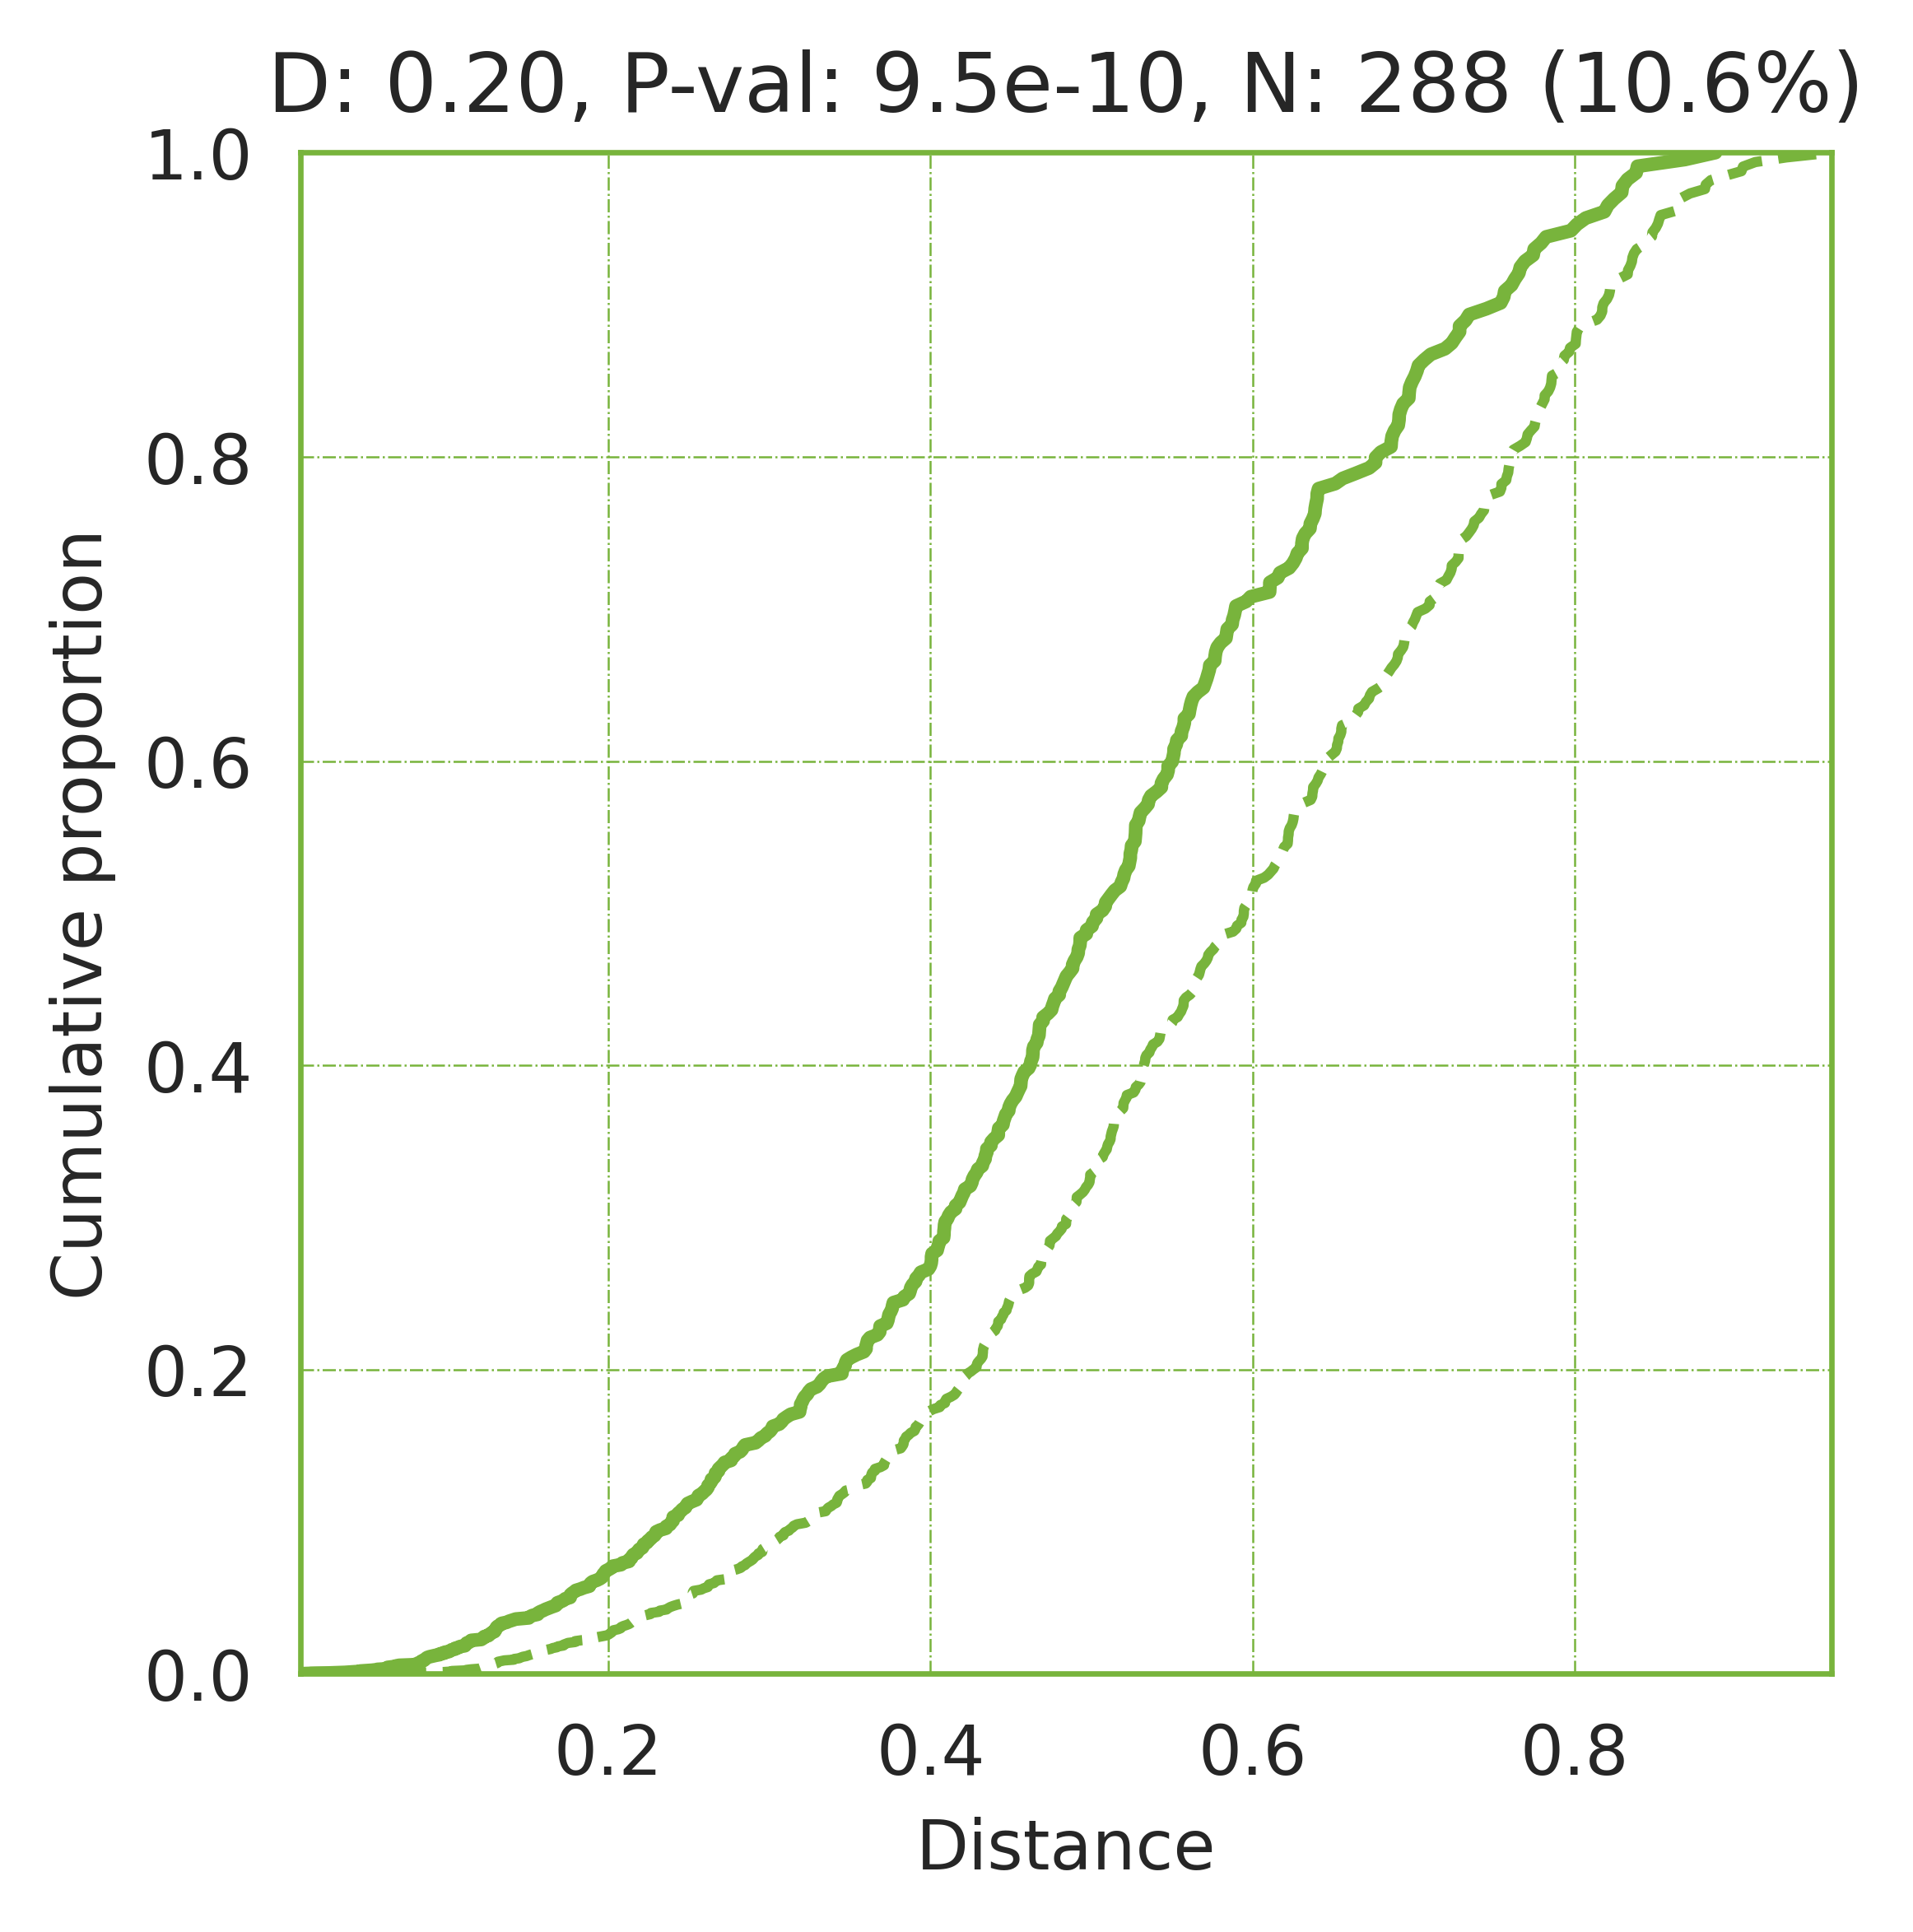

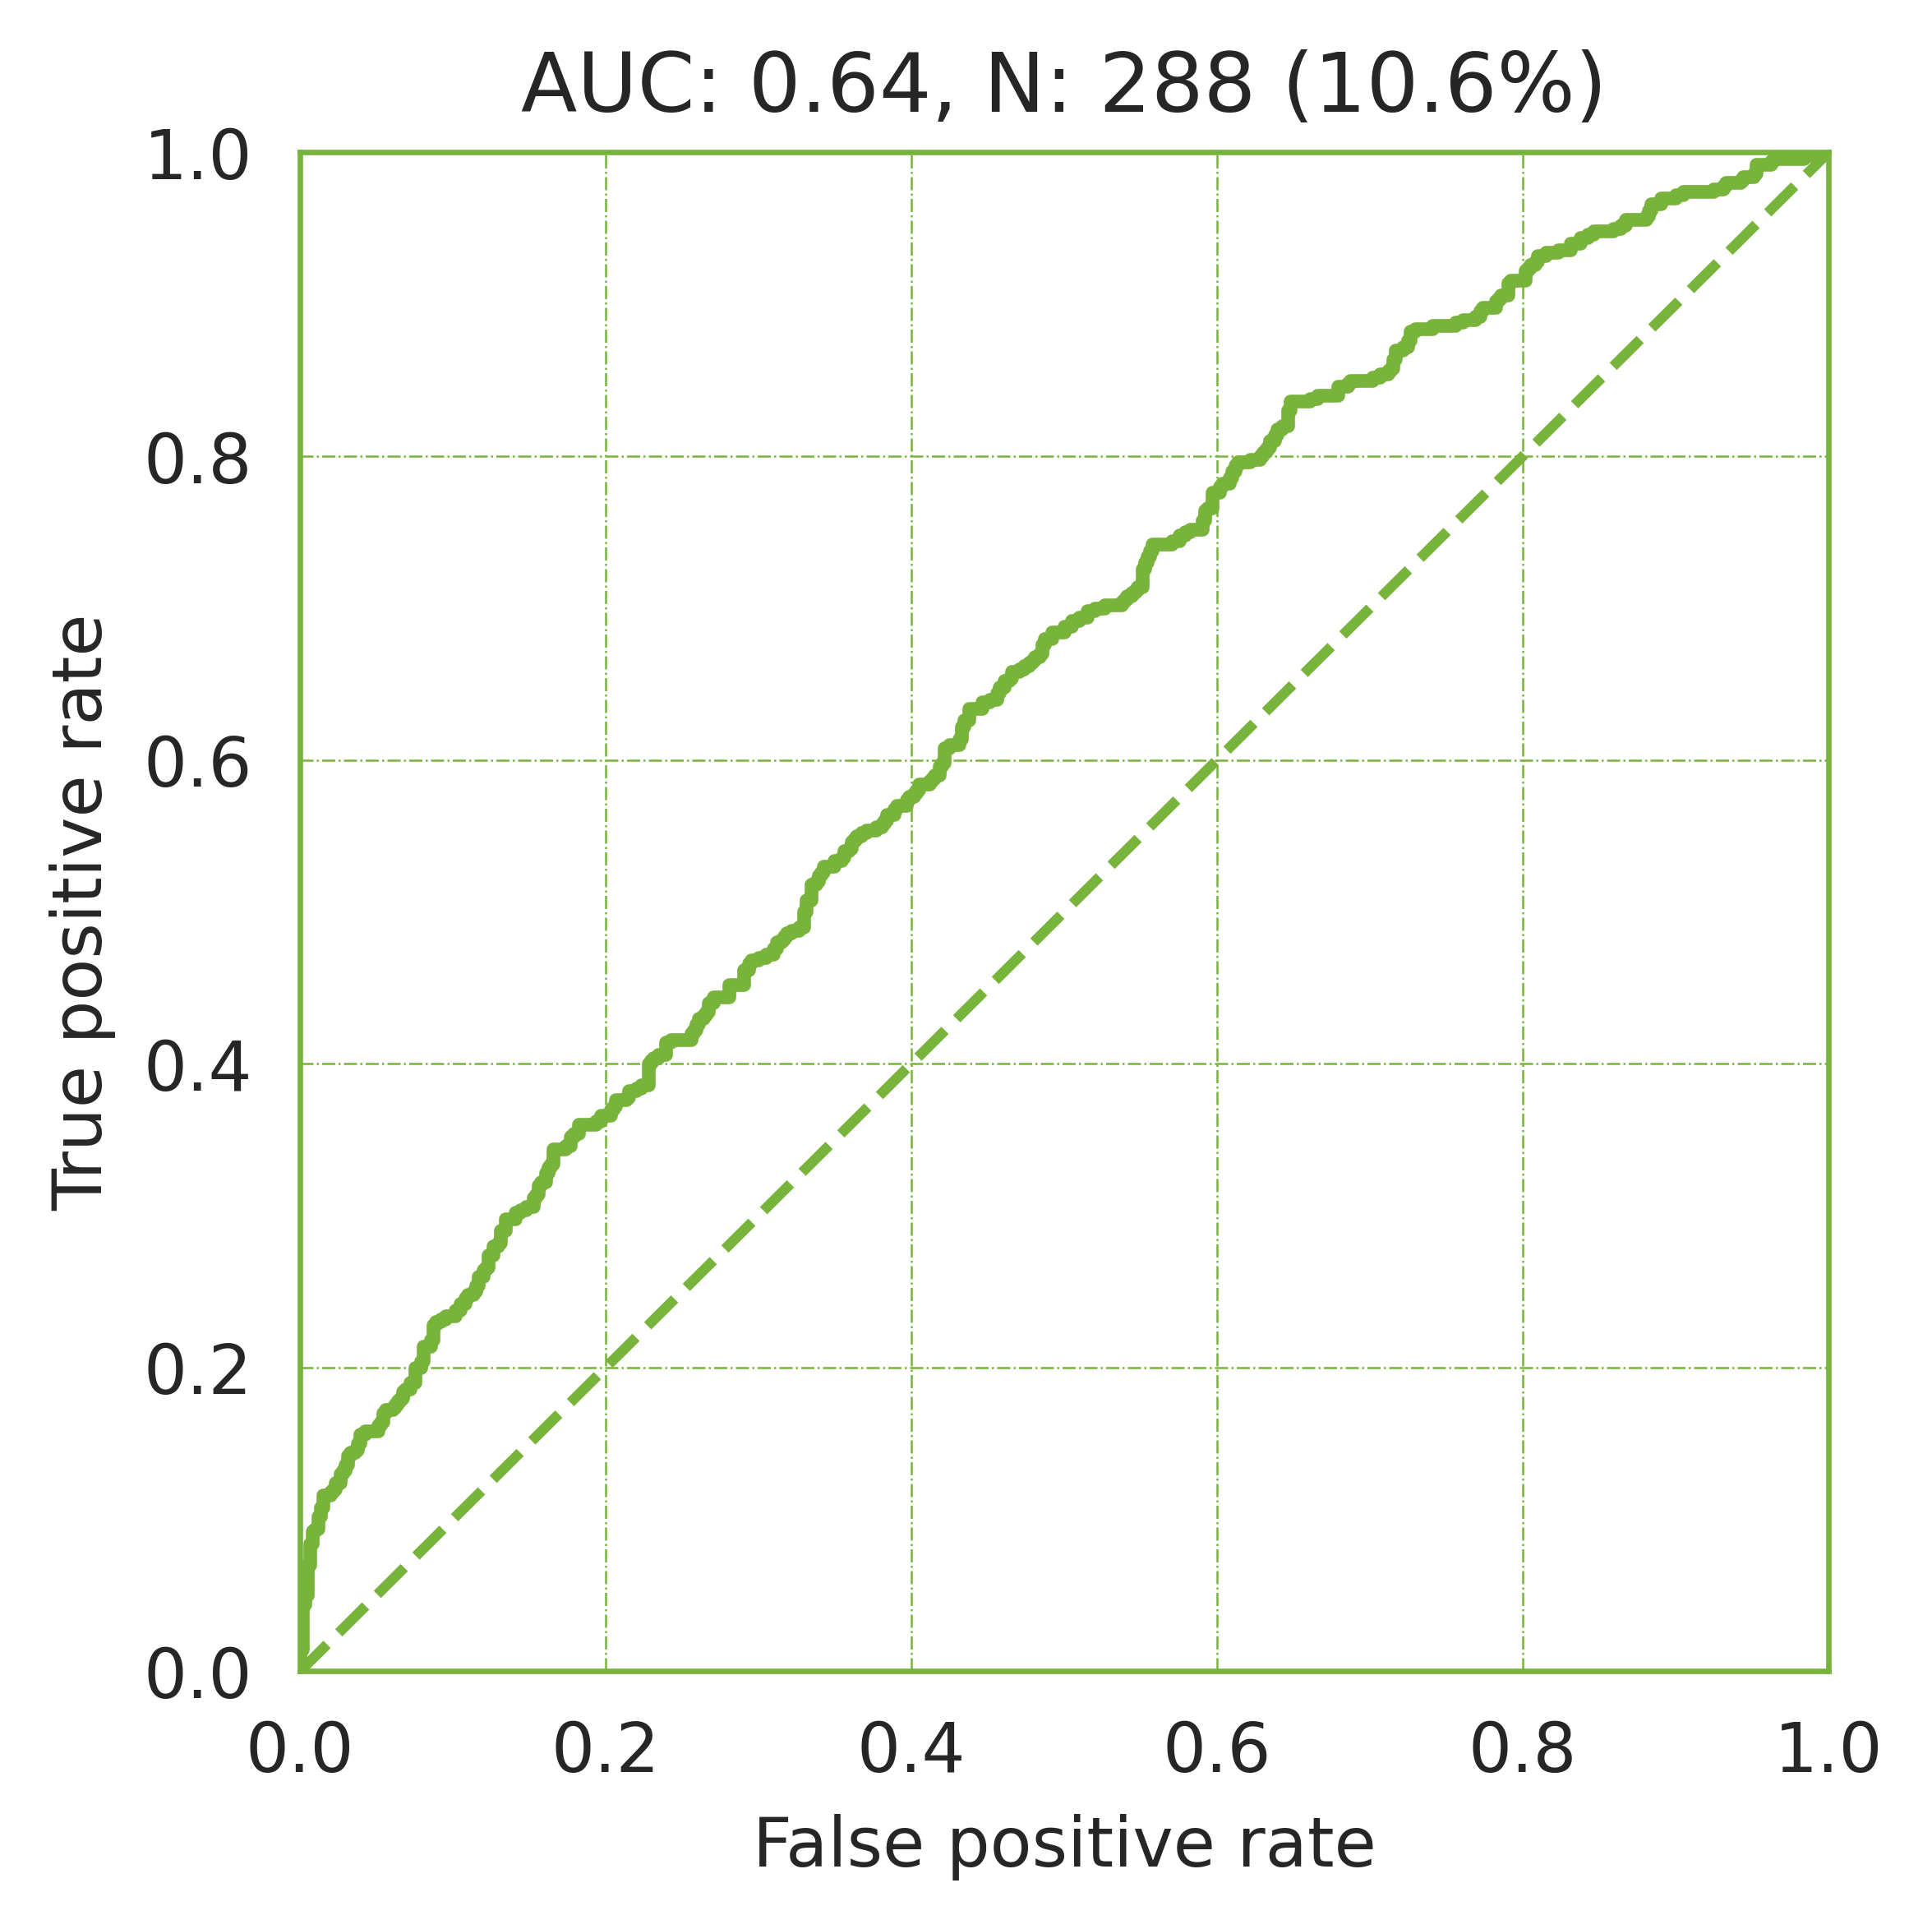

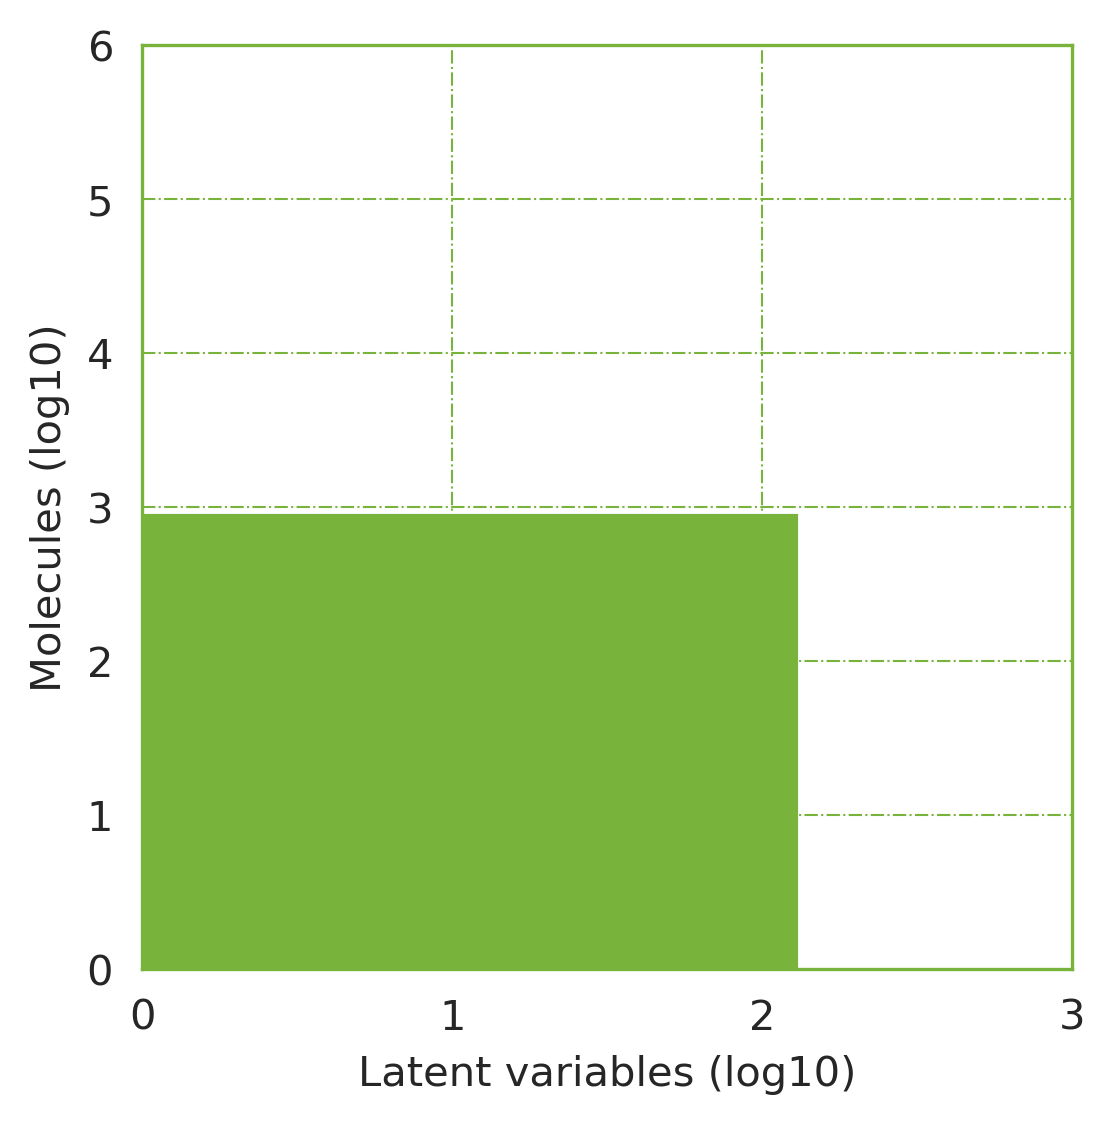

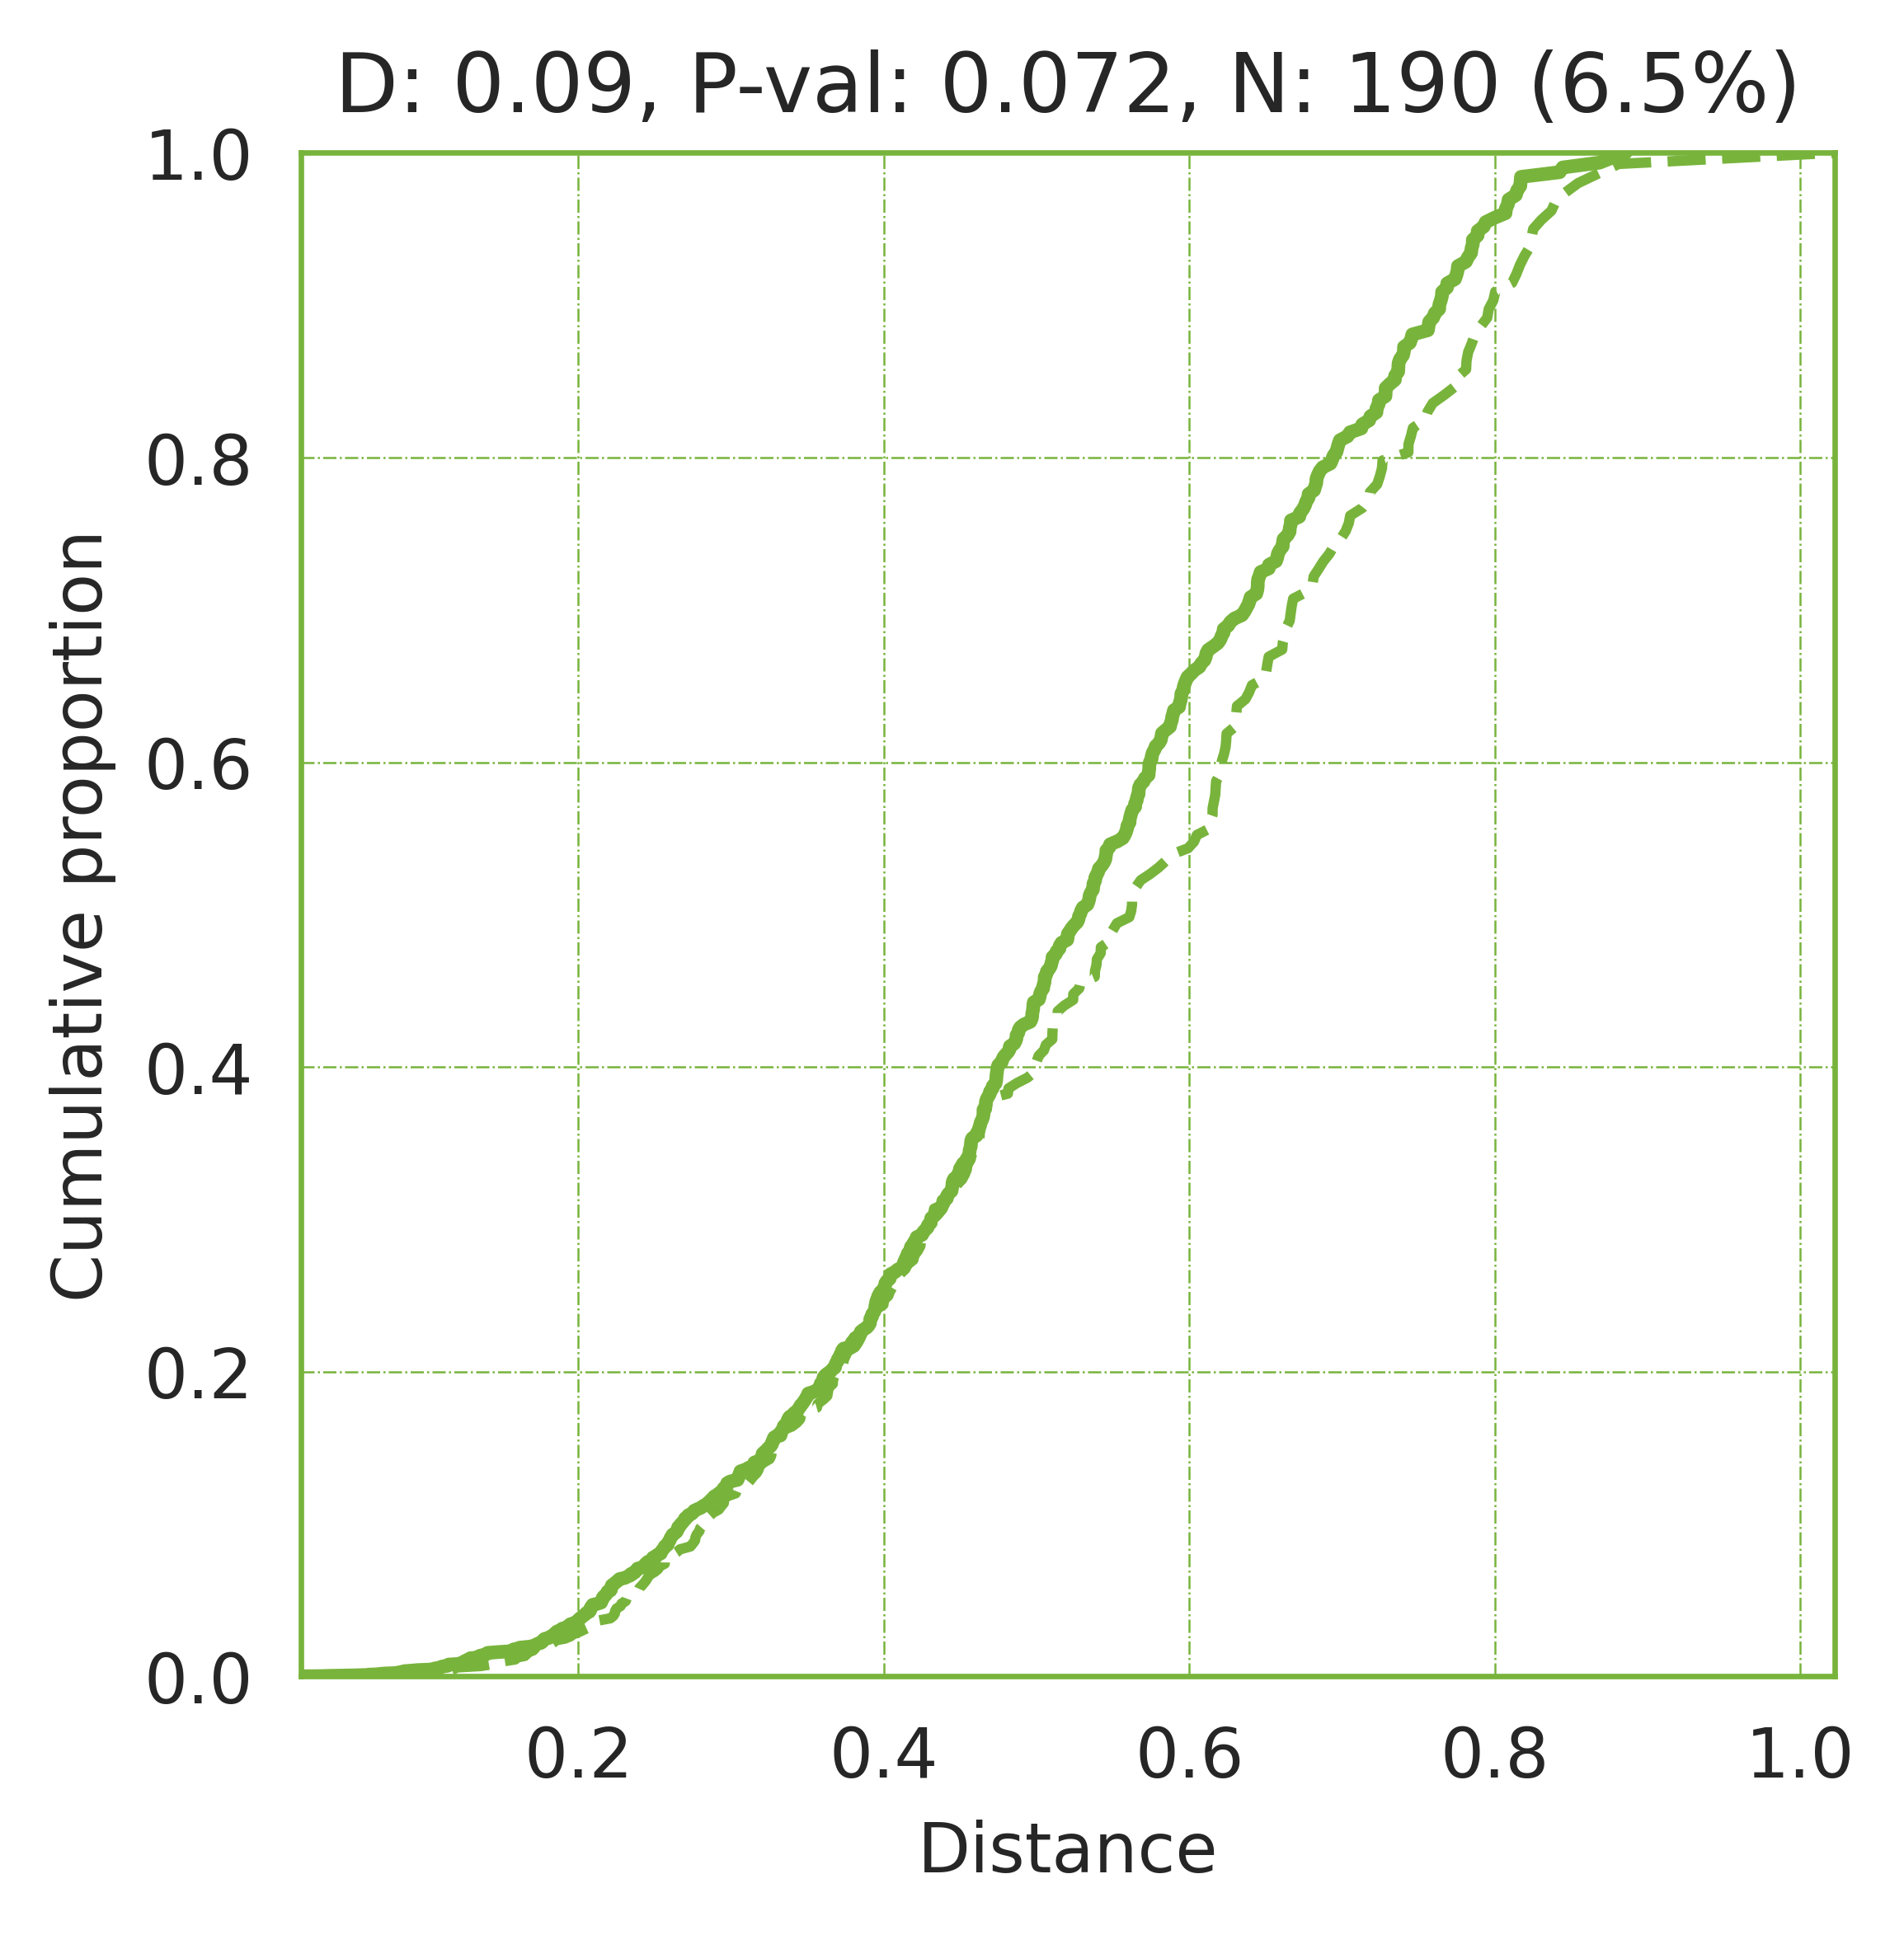

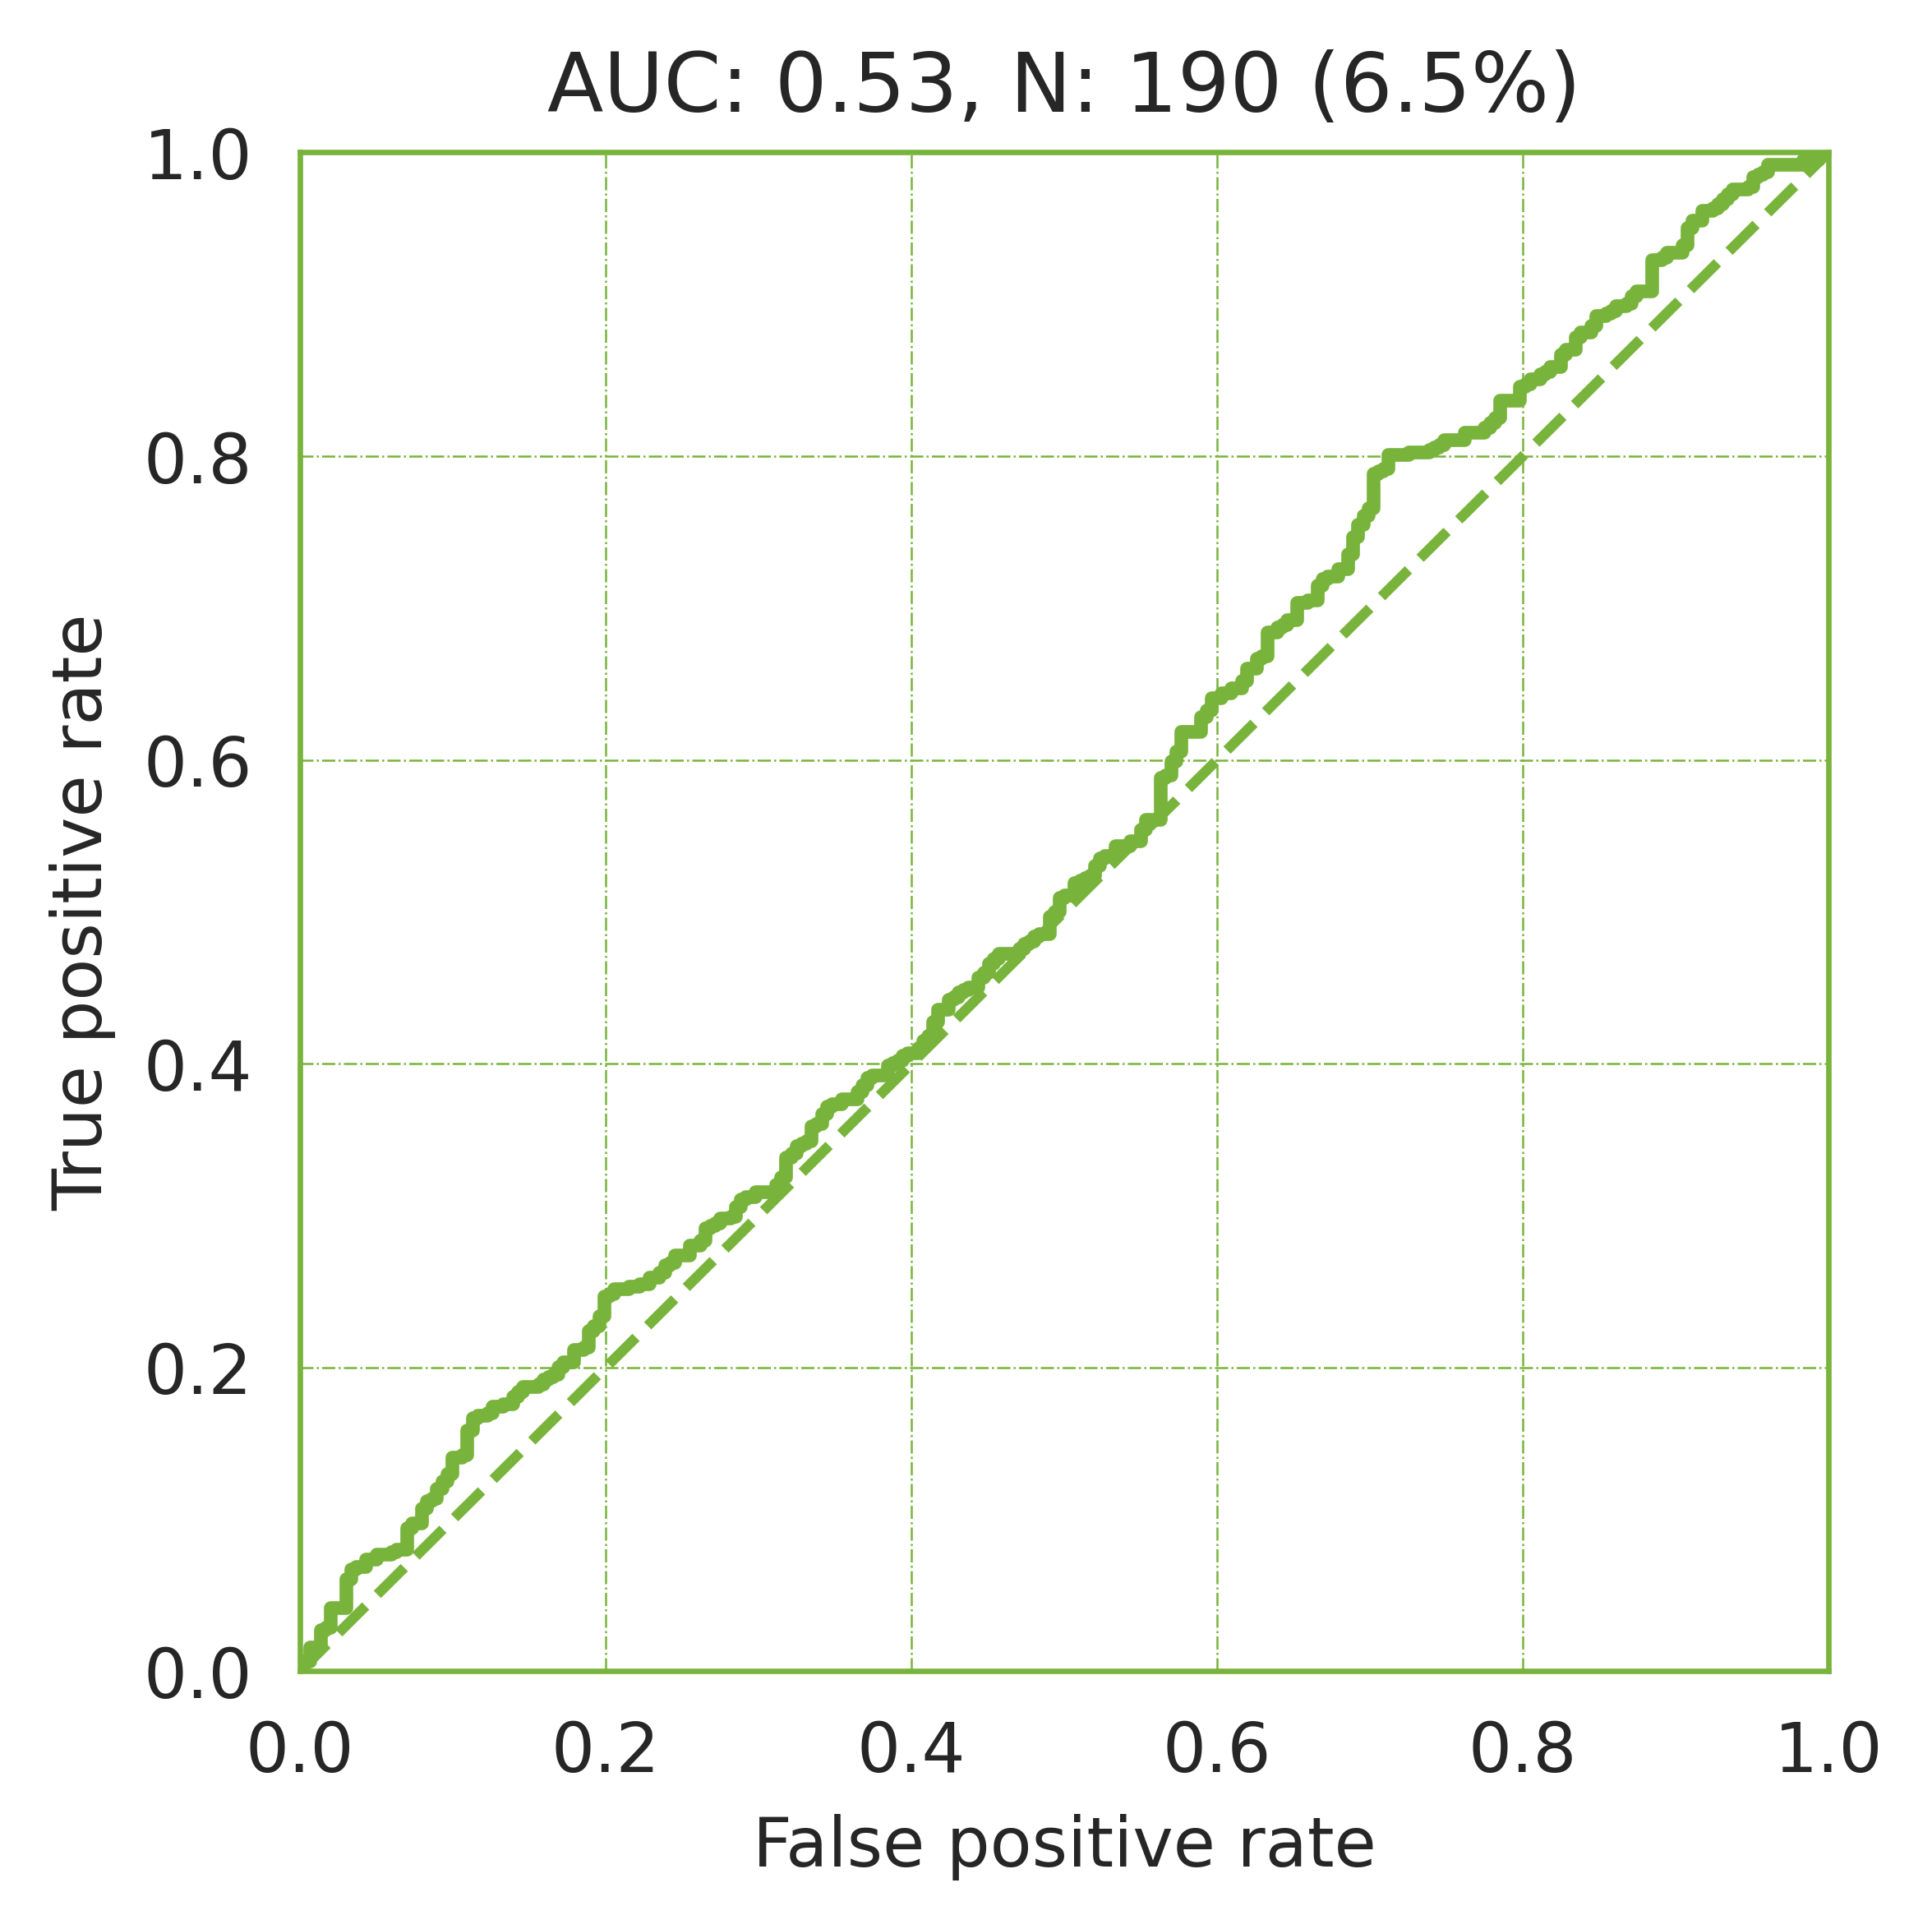

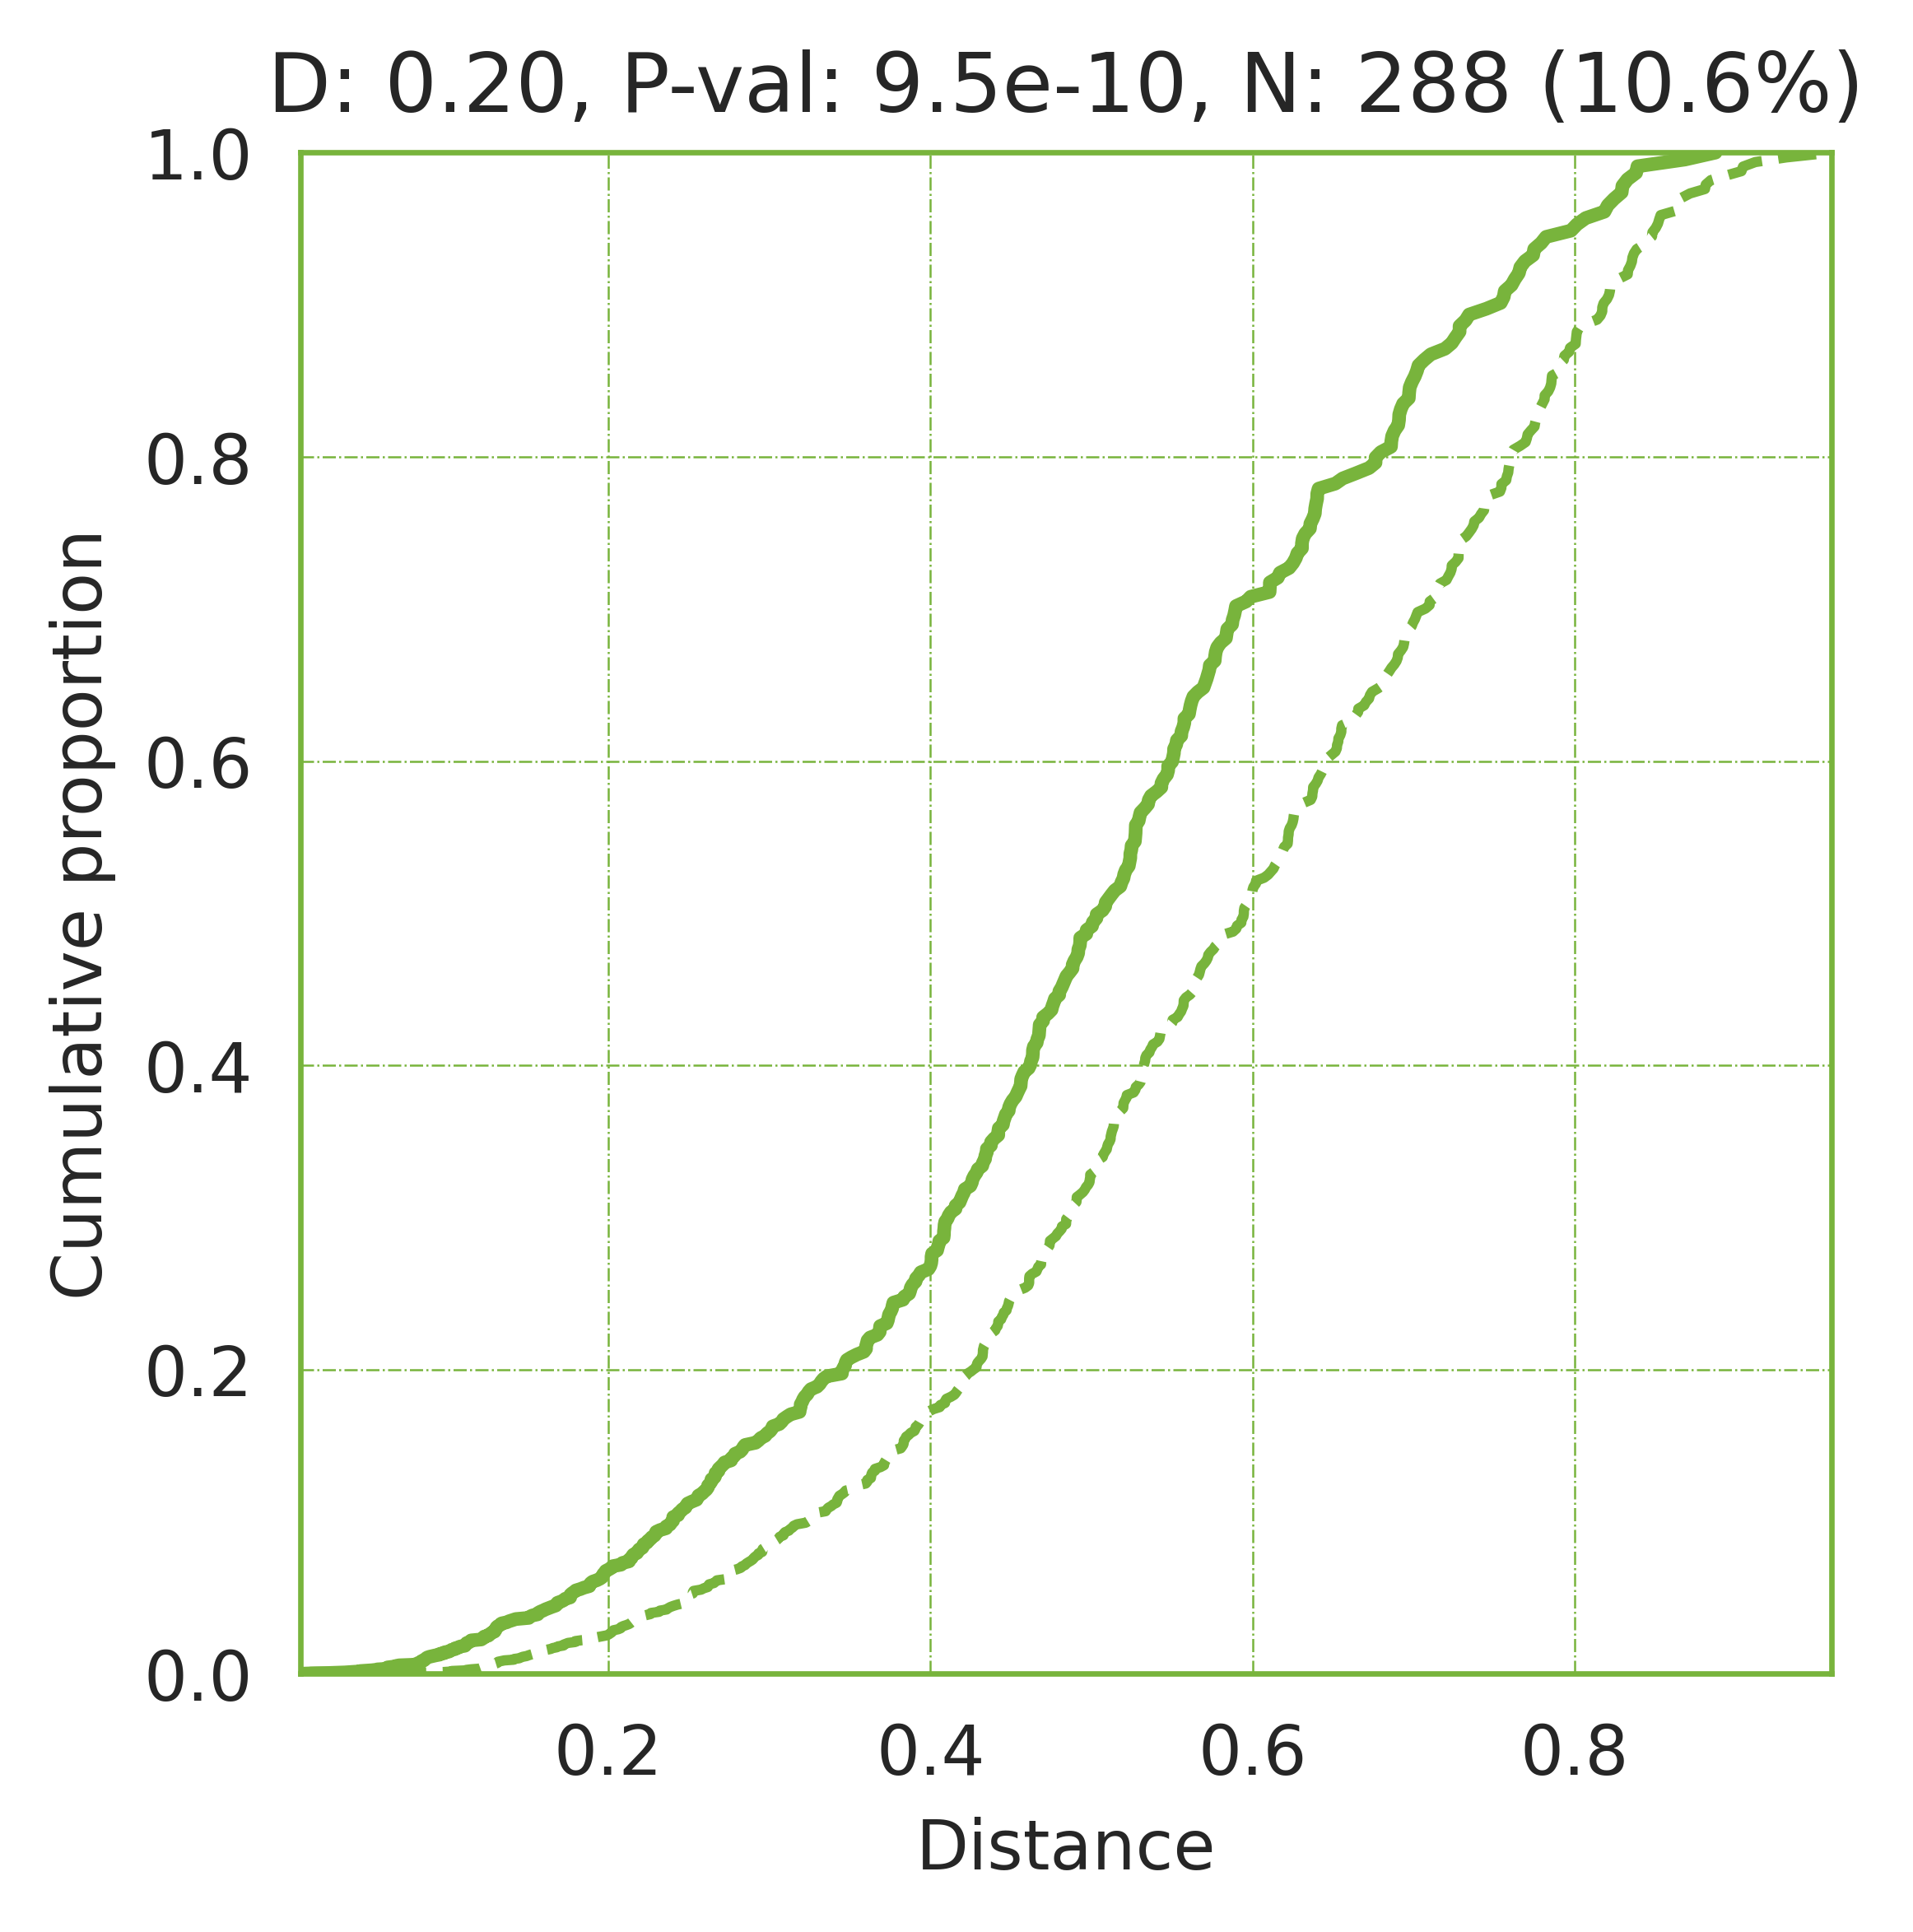

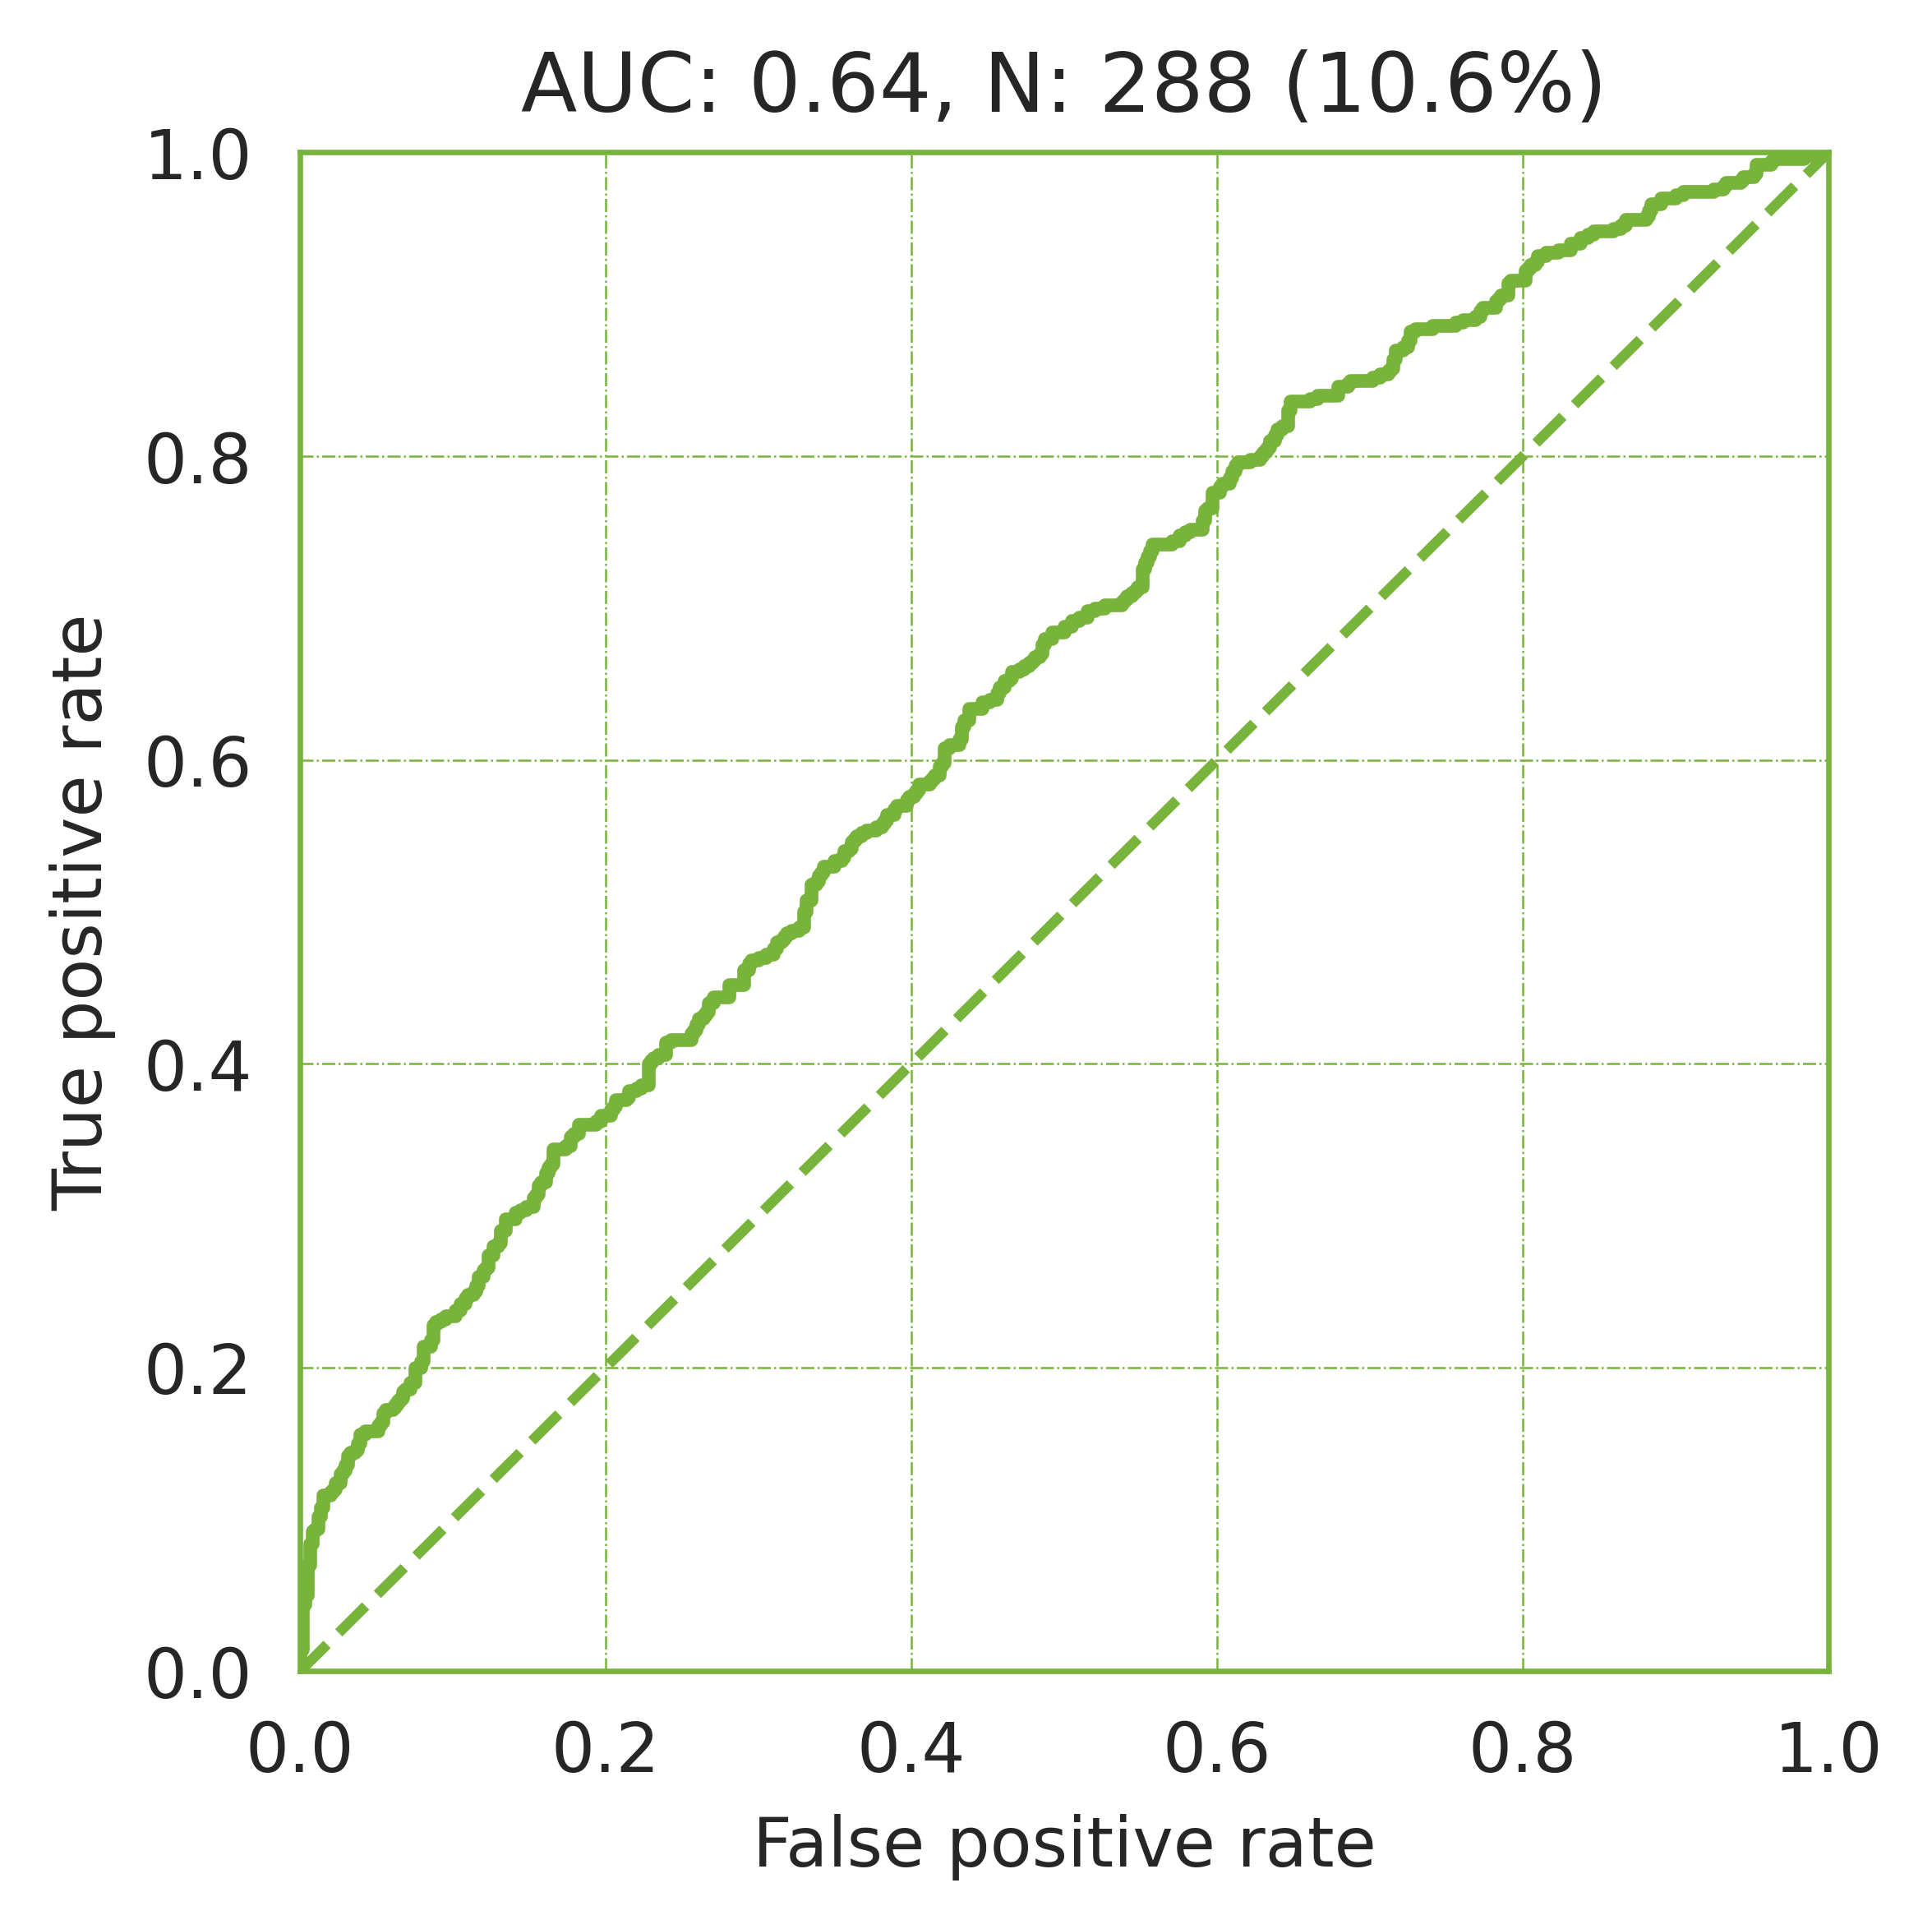

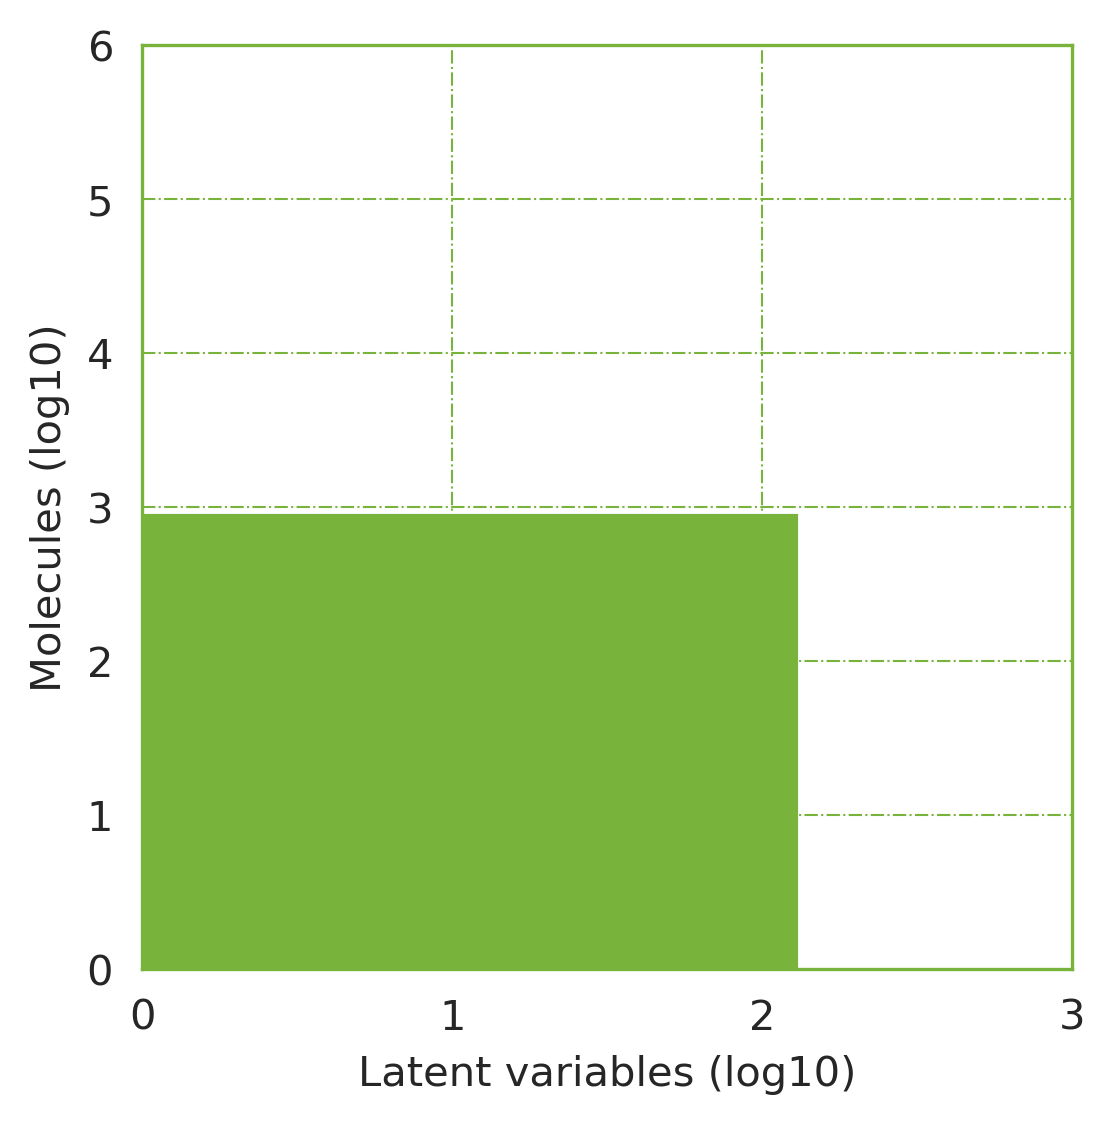

In [21]:
# Dataset Name
dataset = 'D6.001'

# Get sign1
sign1 = cc_local.get_signature('sign1', 'full', dataset)

# Get neig1
neig1 = cc_local.get_signature('neig1', 'full', dataset)  # By default, all vs ref

# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Cleaning both full and reference datasets. This is crucial!
sign2.clear_all()

# Fit sign2 given sign1 & neig1
sign2.fit(sign1, neig1, oos_predictor=False)

In [22]:
sign2.shape

(873, 128)

2024-04-05 09:15:44,727 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign2
2024-04-05 09:15:44,732 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_D6
2024-04-05 09:15:44,893 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-05 09:15:44,896 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 09:15:48,475 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-05 09:15:52,557 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2024-04-05 09:15:54,942 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 803 rows from dataset V
2

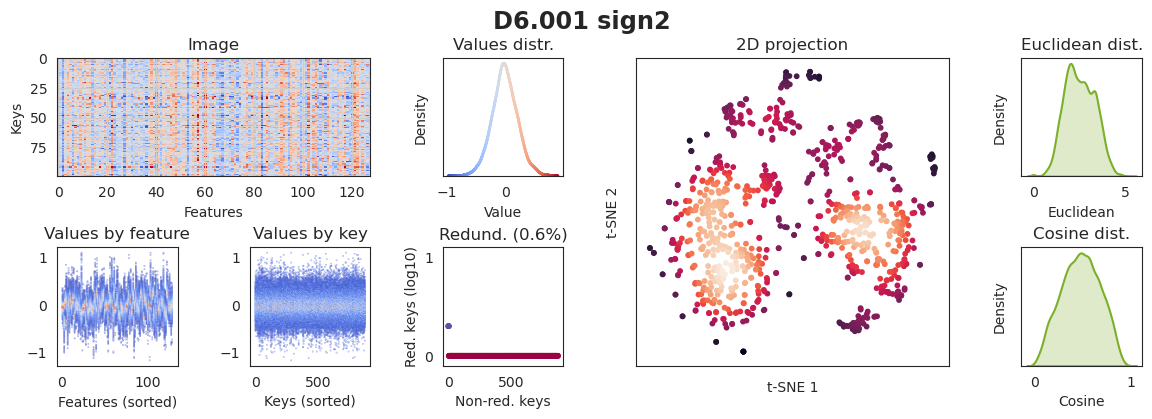

In [23]:
# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Instantiation of diag2 (diagnosis plots)
diag2 = sign2.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag2.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag2.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag2.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

## sign3 ##

In [3]:
# Dataset Name
dataset = 'D6.001'

# Get CC universe
cc_universe = []
for dat in cc_local.datasets:
    if dat != dataset and dat.endswith('001'):
        cc_universe.extend(cc_local.get_signature('sign2', 'full', dat).keys)
cc_universe = set(cc_universe)

# Get sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Get M1 molecules
d6_molecules = set(sign2.keys)

print("Number of molecules in the CC universe sign2: " + str(len(cc_universe)))
print("Number of molecules in D6 sign2: " + str(len(d6_molecules)))
print("Intersection CC & D6: " + str(len(cc_universe.intersection(d6_molecules))))

2024-04-08 15:50:27,446 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign2
2024-04-08 15:50:31,870 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A2/A2.001/sign2
2024-04-08 15:50:35,759 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A3/A3.001/sign2
2024-04-08 15:50:41,312 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A4/A4.001/sign2
2024-04-08 15:50:45,259 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A5/A5.001/sign2
2024-04-08 15:50:49,208 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protoco

Number of molecules in the CC universe sign2: 1009293
Number of molecules in D6 sign2: 873
Intersection CC & D6: 803


In [4]:
# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

# Create a list of sign2 to feed sign3 -- using the 25 CC spaces & M1
sign2_list = list()

# For each CC space
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))

# Append the new M1 space
sign2_list.append(cc_local.get_signature('sign2','full', dataset))

# In total, we now have 26 spaces
print(len(sign2_list))

# Get M1 sign1
sign1_self = cc_local.signature(dataset, 'sign1')

# Get M1 sign2
sign2_self = cc_local.signature(dataset, 'sign2')

2024-04-07 16:22:37,987 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign3
2024-04-07 16:22:37,989 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign1
2024-04-07 16:22:37,992 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign1
2024-04-07 16:22:37,995 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign1
2024-04-07 16:22:37,996 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2024-04-07 16:22:37,997 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/reference/D/D6/D6.001/sign1
2024-04-07 16:22:37,998 chemicalche

26


In [ ]:
import os
# Specify CC_config file
os.environ['CC_CONFIG'] = '/aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json'

# Fit sign3 in the cluster
kwargs = {"cpu": 32, "mem_by_core": 1, "wait": False}
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, sign2_universe=None, complete_universe="full", sign2_coverage=None, hpc_args=kwargs)

2024-04-07 16:26:22,809 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json
2024-04-07 16:26:22,810 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json
2024-04-07 16:26:22,836 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2024-04-07 16:26:22,837 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2024-04-07 16:26:24,486 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: CC_SIGN3_D6.001_fit__
2024-04-07 16:26:24,487 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/acomajuncosa/CC/tmp_jobs/CC_SIGN3_D6.001_fit__esp08xvr/job-CC_SIGN3_D6.001_fit__.sh...
2024-04-07 16:26:24,490 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q@pac-one107,all.q@pac-one109,all.q@pac-one301,all.q@p

In [3]:
dataset = 'D6.001'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

print(sign3.shape)

2024-04-08 17:18:40,713 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign3


(1009363, 128)


In [4]:
signatures = np.array(sign3)
print(min(signatures.flatten()), max(signatures.flatten()))

In [5]:
min(signatures.flatten()), max(signatures.flatten())

(-0.26447954773902893, 0.26823562383651733)

2024-04-08 17:18:40,765 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/D/D6/D6.001/sign3
2024-04-08 17:18:40,768 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_D6
2024-04-08 17:18:41,303 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-08 17:18:41,307 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-08 17:18:44,400 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_D6/full/A/A1/A1.001/sign0
2024-04-08 17:18:59,264 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset V
2024-04-08 17:19:32,425 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset

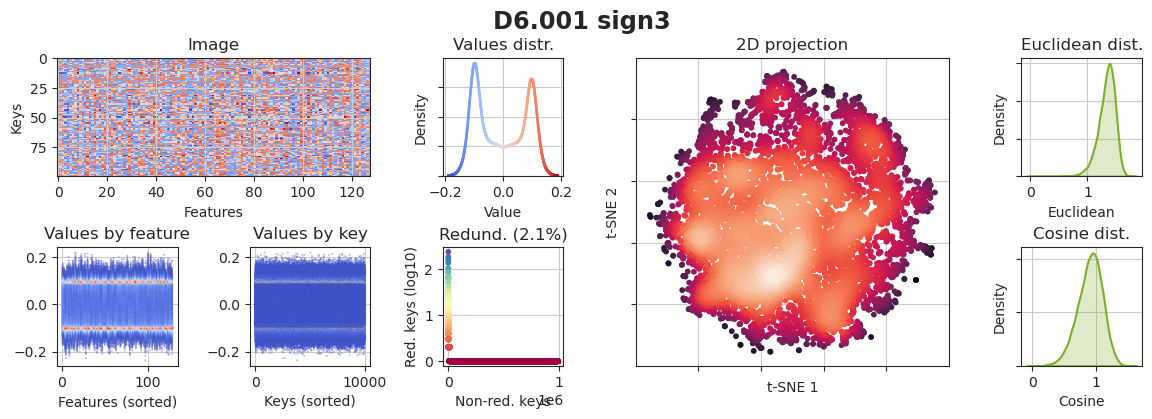

In [4]:
dataset = 'D6.001'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

# Instantiation of diag3 (diagnosis plots)
diag3 = sign3.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag3.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag3.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag3.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})